### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- exploring the structure using decision trees (Week 2)
- exploring clusters in customer behaviour (Week 3)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 4)
- loading, transforming and visualising data in R (Week 5)
- statistical analysis and modelling in R (Week 6)

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and goodness of fit metrics to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats as sms
import math 

from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

In [2]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
print(reviews.info())
reviews.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB
None


gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [3]:
# Any missing values?
print(reviews.isnull().sum())


gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64


In [4]:
# Explore the data withdescribe, check the types and view the metadata
print(reviews.dtypes)
print(reviews.columns)
reviews.describe()

gender                     object
age                         int64
remuneration (k£)         float64
spending_score (1-100)      int64
loyalty_points              int64
education                  object
language                   object
platform                   object
product                     int64
review                     object
summary                    object
dtype: object
Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'language', 'platform', 'product',
       'review', 'summary'],
      dtype='object')


age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
count  2000.000000        2000.000000             2000.000000     2000.000000   
mean     39.495000          48.079060               50.000000     1578.032000   
std      13.573212          23.123984               26.094702     1283.239705   
min      17.000000          12.300000                1.000000       25.000000   
25%      29.000000          30.340000               32.000000      772.000000   
50%      38.000000          47.150000               50.000000     1276.000000   
75%      49.000000          63.960000               73.000000     1751.250000   
max      72.000000         112.340000               99.000000     6847.000000   

            product  
count   2000.000000  
mean    4320.521500  
std     3148.938839  
min      107.000000  
25%     1589.250000  
50%     3624.000000  
75%     6654.000000  
max    11086.000000

## 2. Drop columns

In [5]:
# Drop unnecessary columns.
reviews = reviews.drop(columns=['language', 'platform'])


# View column names.
print(reviews.columns)


Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')


## 3. Rename columns

In [6]:
# Rename the column headers.
reviews = reviews.rename(columns={'remuneration (k£)': 'remuneration', 'spending_score (1-100)': 'spending_score'})


# View column names.
print(reviews.columns)

Index(['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')


## 4. Save the DataFrame as a CSV file

In [7]:
# Create a CSV file as output.
reviews.to_csv('turtle_reviews_clean.csv', index=False)


In [8]:
# Import new CSV file with Pandas.
reviews = pd.read_csv('turtle_reviews_clean.csv')

# View DataFrame.
reviews.head()

gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

## 5.1 Linear regression - OLS

### 5.1.1 spending vs loyalty

In [9]:
# Define independent variable.
X = reviews['spending_score']

# Define dependent variable.
y = reviews['loyalty_points']

# Create constant term.
X = sm.add_constant(X)

# Create model and print summary of metrics.
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Sat, 12 Apr 2025   Prob (F-statistic):          2.92e-263
Time:                        13:08:58   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -75.0527     45.931     -1.

 - R² = 45.2% of the variance in loyalty points is explained by the spending score. This indicates a moderate level of explanatory power.
 - Skew =  0.422 means that the data is fairly symmetrical, with a slight positive skew, indicating a small tail on the right side of the distribution.
 - Kurtosis = 4.554 indicates that the data has heavier tails and a sharper peak compared to a normal distribution, suggesting the presence of outliers.
 - An F-statistic of 1648 with a p-value of 2.92e-263 indicates that the overall regression model is statistically significant, meaning that the spending score has a strong relationship with loyalty points.

<function matplotlib.pyplot.show(close=None, block=None)>

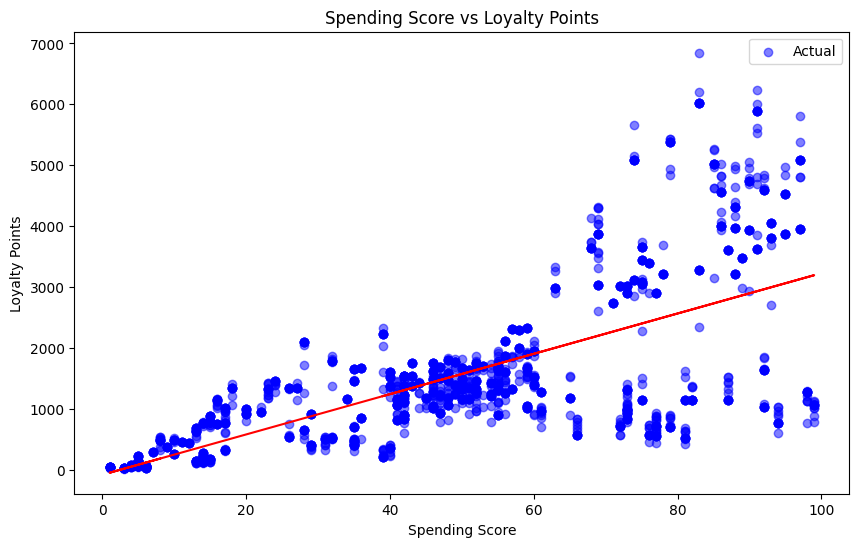

In [10]:
# Plot the regression results
predictions = model.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(reviews['spending_score'], reviews['loyalty_points'], color='blue', alpha=0.5, label='Actual')
plt.plot(reviews['spending_score'], predictions, color='red')
plt.xlabel('Spending Score')
plt.ylabel('Loyalty Points')
plt.title('Spending Score vs Loyalty Points')
plt.legend()
plt.show

### 5.1.2 renumeration vs loyalty

In [11]:
# Define independent variable.
X = reviews['remuneration']

# Define dependent variable.
y = reviews['loyalty_points']

# Create constant term.
X = sm.add_constant(X)

# Create model and print summary of metrics.
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Sat, 12 Apr 2025   Prob (F-statistic):          2.43e-209
Time:                        13:08:58   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -65.6865     52.171     -1.259   

 - R² = 38% of the variance in the loyalty points is explained by the remuneration. This indicates a weak to moderate relationship between the variables.
 - Skew = 0.089 suggests that the data is nearly symmetrical, indicating a very slight positive skew, with the distribution being almost balanced around the mean.
 - Kurtosis = 3.59 suggests that the data has slightly heavier tails and a sharper peak compared to a normal distribution, indicating the presence of some outliers.
 - An F-statistic of 1222 with a p-value of 2.43e-209 indicates the overall regression model is statistically significant, meaning that remuneration has a strong relationship with loyalty points.


<function matplotlib.pyplot.show(close=None, block=None)>

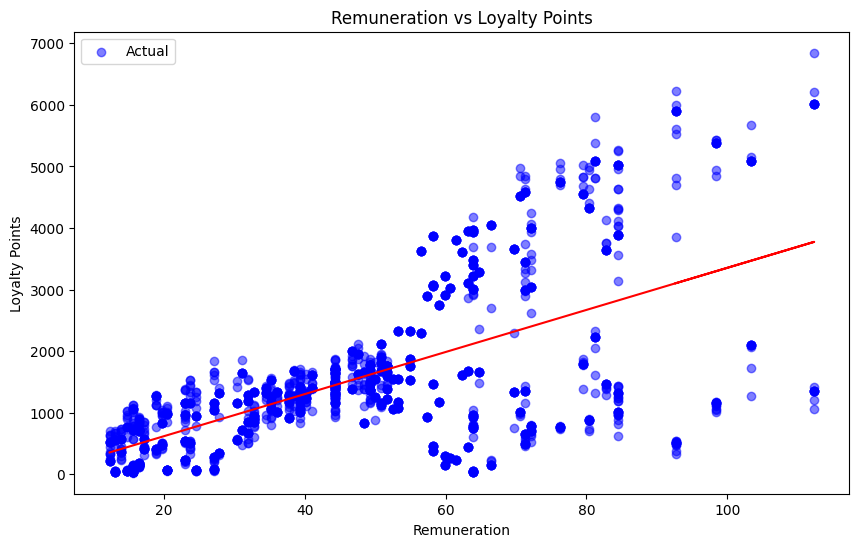

In [12]:
# Plot the regression results
predictions = model.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(reviews['remuneration'], reviews['loyalty_points'], color='blue', alpha=0.5, label='Actual')
plt.plot(reviews['remuneration'], predictions, color='red')
plt.xlabel('Remuneration')
plt.ylabel('Loyalty Points')
plt.title('Remuneration vs Loyalty Points')
plt.legend()
plt.show

### 5.1.3 age vs loyalty

In [13]:
# Define independent variable.
X = reviews['age']

# Define dependent variable.
y = reviews['loyalty_points']

# Create constant term.
X = sm.add_constant(X)

# Create model and print summary of metrics.
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Sat, 12 Apr 2025   Prob (F-statistic):             0.0577
Time:                        13:08:58   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1736.5177     88.249     19.678      0.0

 - R² = 0.2% of the variance in loyalty points is explained by age. This indicates a very weak relationship between the variables, meaning age has almost no predictive power for loyalty points.
 - Skew = 1.449 suggests that the data is positively skewed, meaning the distribution has a longer tail on the right side, indicating that there are more extreme high values compared to low values.
 - Kurtosis = 4.688 suggests that the data has heavier tails and a sharper peak compared to a normal distribution, indicating the presence of outliers.
 - An F-statistic of 3.606 with a p-value of 0.0577 suggests that the overall regression model is not statistically significant at the conventional 0.05 level. This means there is insufficient evidence to conclude that age has a meaningful linear relationship with loyalty points.


<function matplotlib.pyplot.show(close=None, block=None)>

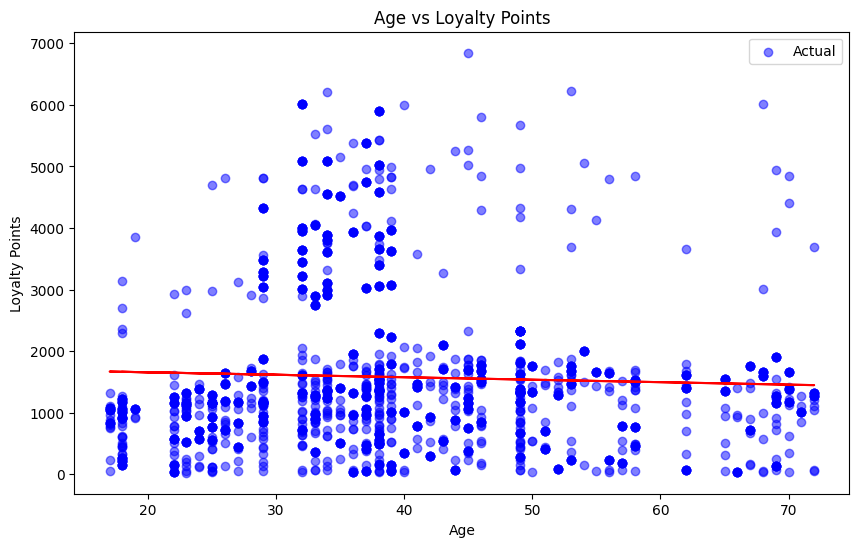

In [14]:
# Plot the regression results
predictions = model.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(reviews['age'], reviews['loyalty_points'], color='blue', alpha=0.5, label='Actual')
plt.plot(reviews['age'], predictions, color='red')
plt.xlabel('Age')
plt.ylabel('Loyalty Points')
plt.title('Age vs Loyalty Points')
plt.legend()
plt.show

## 6. Observations and insights

## Insights and Observations from Simple Linear Regression Models

1. **Spending Score vs Loyalty Points**:
    - **R² = 45.2%**: Indicates that 45.2% of the variance in loyalty points is explained by the spending score. This suggests a moderate linear relationship.
    - **Significance**: The F-statistic and p-value indicate that the model is statistically significant, meaning spending score is a meaningful predictor of loyalty points.
    - **Residual Analysis**: Skewness (**0.422**) and kurtosis (**4.554**) suggest the presence of outliers and a slight positive skew in the data.
    - **Business Insight**: Spending score is a moderately strong predictor of loyalty points, making it a key variable for loyalty program strategies.

2. **Remuneration vs Loyalty Points**:
    - **R² = 38%**: Indicates that 38% of the variance in loyalty points is explained by remuneration. This suggests a weak to moderate linear relationship.
    - **Significance**: The F-statistic and p-value confirm that the model is statistically significant, meaning remuneration is a meaningful predictor of loyalty points.
    - **Residual Analysis**: Skewness (**0.089**) and kurtosis (**3.59**) suggest the data is nearly symmetrical but has slightly heavier tails.
    - **Business Insight**: Remuneration is a weaker predictor compared to spending score but still provides valuable insights into customer loyalty.

3. **Age vs Loyalty Points**:
    - **R² = 0.2%**: Indicates that only 0.2% of the variance in loyalty points is explained by age. This suggests a very weak linear relationship.
    - **Significance**: The F-statistic and p-value indicate that the model is not statistically significant, meaning age is not a meaningful predictor of loyalty points.
    - **Residual Analysis**: Skewness (**1.449**) and kurtosis (**4.688**) suggest a positively skewed distribution with outliers.
    - **Business Insight**: Age has almost no predictive power for loyalty points and may not be a useful variable for loyalty program strategies.

4. **General Observations**:
    - Spending score and remuneration are statistically significant predictors of loyalty points, with spending score being the stronger predictor.
    - Age does not have a meaningful relationship with loyalty points and may not be relevant for predictive modeling in this context.
    - Residual analysis highlights the presence of outliers in the data, which may impact model performance.

5. **Recommendations**:
    - Focus on spending score and remuneration for loyalty program strategies and customer segmentation.
    - Explore additional variables or interactions to enhance the explanatory power of the models.
    - Validate the models using cross-validation techniques to ensure robustness.

Overall, the simple linear regression models provide valuable insights into the factors influencing loyalty points, with spending score emerging as the most impactful predictor.


# Week 2 assignment: Exploring the structure using decision trees.

The team wants you to use decision trees to attempt to better understand the structure found in the data. You need to grow and prune a decision tree regressor and then visualise and interpret the output.
Make sure to comment on the potential usefulness in decision-making processes and your observations regarding the model.

## Instructions
1. Prepare the data for creating your decision tree. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame with the appropriate columns.
        1. Specify that loyalty points is the target variable (Y) and should be excluded from your input data.
        2. Specify X for the independent variables and y as the dependent variable. Therefore, df\[cols\] will be the independent variables and the column containing loyalty points the dependent variable.
        3. Explore the new DataFrame. 
2. Split the data set into a train and test sets for both X and y at a 70:30 ratio. As previously, random_state=42.
3. Create a decision tree regressor to explore the impact of other features on the loyalty points.
    1. Import the DecisionTreeRegressor class from the sklearn.tree library. 
    2. Create a variable (e.g. regressor) to store the DecisionTreeRegressor() class. (As previously, random_state=42.).
    3. Fit the regressor object to the data set with the fit() function.
    4. Remember to prune your tree using basic pruning strategies and compare the performance before and after applying the pruning strategy.
    5. Plot the final decision tree.
4. Fit a final model and interpret the output.
    1. Justify your selection of pruning strategy implemented and interpret the output.
    2. Evaluate the usefulness of the obtained result and interpret the tree and how it could be used to inform business decisions in the organisation.
5. Summarise (150–200 words) the most important business insights, anything you would like to explore further, and suggested future actions.
 
Back up your work to a safe location. This will allow you to revert to a previous state in the case of making a mistake in the code or deleting a section by mistake. (A simple way of doing this is to save or email a compressed version to yourself at frequent intervals.)


## 1. Load and prepare the data

In [15]:
# Import all the necessary packages
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree 
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import warnings
import matplotlib.pyplot as plt

# Settings for the notebook.
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = [15, 10]

In [16]:
# Create your new DataFrame.
reviews1 = pd.read_csv('turtle_reviews_clean.csv')

# View the DataFrame.
print(reviews1.info())
reviews1.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB
None


gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [17]:
# Create new DataFrame and convert categorical variables to dummy variables.
cat_vars = ["gender", "education"]

# Use the for loop keyword to specify what actions to apply to all the 'var' items.
for var in cat_vars:
    # Specify details of the categorical list.
    cat_list = pd.get_dummies(reviews1[var], prefix=var)
    # Specify data type as int.
    cat_list = cat_list.astype(int)
    # Indicate the joining of the DataFrames.
    reviews1 = reviews1.join(cat_list)

reviews_fin = reviews1.drop(cat_vars, axis=1) 

# Set a temporary DataFrame and add values.
reviews_vars = reviews_fin.columns.values.tolist()  

# Indicate what columns are kept.
to_keep = [i for i in reviews_vars if i not in cat_vars] 

# Define new DataFrame.
reviews_fin = reviews1[to_keep]  

# Print the column.
reviews_fin.columns.values

array(['age', 'remuneration', 'spending_score', 'loyalty_points',
       'product', 'review', 'summary', 'gender_Female', 'gender_Male',
       'education_Basic', 'education_PhD', 'education_diploma',
       'education_graduate', 'education_postgraduate'], dtype=object)

In [18]:
# View the DataFrame.
reviews_fin.head()

age  remuneration  spending_score  loyalty_points  product  \
0   18         12.30              39             210      453   
1   23         12.30              81             524      466   
2   22         13.12               6              40      254   
3   25         13.12              77             562      263   
4   33         13.94              40             366      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  gender_Female  \
0  The fact that 50% of this space is wasted on a...              0   
1  Another worthless Dungeon Master's screen from...              0   
2                    pretty, but also pretty useless              1   
3                                         Five Stars              1   
4                                         Money trap              1   

   gender_Male  education_Basic  education_PhD  education_diploma  \
0            1                0              0                  0   
1            1                0              0                  0   
2            0                0              0                  0   
3            0                0              0                  0   
4            0                0              0                  0   

   education_graduate  education_postgraduate  
0                   1                       0  
1                   1                       0  
2                   1                       0  
3                   1                       0  
4                   1                       0

In [19]:
# Specify Y.
y = reviews_fin["loyalty_points"]


# Specify X.
X = reviews_fin.drop(["loyalty_points", 'review', 'summary', 'product'], axis=1)


In [20]:
# Review X
X



age  remuneration  spending_score  gender_Female  gender_Male  \
0      18         12.30              39              0            1   
1      23         12.30              81              0            1   
2      22         13.12               6              1            0   
3      25         13.12              77              1            0   
4      33         13.94              40              1            0   
...   ...           ...             ...            ...          ...   
1995   37         84.46              69              1            0   
1996   43         92.66               8              1            0   
1997   34         92.66              91              0            1   
1998   34         98.40              16              0            1   
1999   32         92.66               8              0            1   

      education_Basic  education_PhD  education_diploma  education_graduate  \
0                   0              0                  0                   1   
1                   0              0                  0                   1   
2                   0              0                  0                   1   
3                   0              0                  0                   1   
4                   0              0                  0                   1   
...               ...            ...                ...                 ...   
1995                0              1                  0                   0   
1996                0              1                  0                   0   
1997                0              0                  0                   1   
1998                0              1                  0                   0   
1999                0              1                  0                   0   

      education_postgraduate  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0  
...                      ...  
1995                       0  
1996                       0  
1997                       0  
1998                       0  
1999                       0  

[2000 rows x 10 columns]

In [21]:
# Review Y
y.head()

0    210
1    524
2     40
3    562
4    366
Name: loyalty_points, dtype: int64

## 2. Create train and test data sets.

In [22]:
# Split the data into test and train data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 3. Create Decision tree regressor

In [23]:
# Create your decision tree regressor.
regressor = DecisionTreeRegressor(random_state=42)

# Fit the regressor object to the data set.
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [24]:
# Evaluate the model.
# Predict on training data.
y_train_pred = regressor.predict(X_train)

# Predict on testing data.
y_test_pred = regressor.predict(X_test)

# Calculate R-squared for training data.
r_squared_train = metrics.r2_score(y_train, y_train_pred)

# Calculate R-squared for testing data.
r_squared_test = metrics.r2_score(y_test, y_test_pred)

# Print R-squared values.
print("R-squared for training data:", r_squared_train)
print("R-squared for testing data:", r_squared_test)


R-squared for training data: 1.0
R-squared for testing data: 0.9953086599244081


In [25]:
# Predict the response for the data test.
y_predict = regressor.predict(X_test)  

# Print the MAE and MSE to evaluate the model.
print("Mean Absolute Error = {:2.2f}".format(metrics.mean_absolute_error(y_test, y_predict)))
print("Mean Squared Error = {:2.2f}".format(metrics.mean_squared_error(y_test, y_predict)))

# Calculate the RMSE.
print("Root Mean Squared Error = {:2.2f}".format(math.sqrt(metrics.mean_squared_error(y_test, y_predict))))


Mean Absolute Error = 31.95
Mean Squared Error = 7599.02
Root Mean Squared Error = 87.17


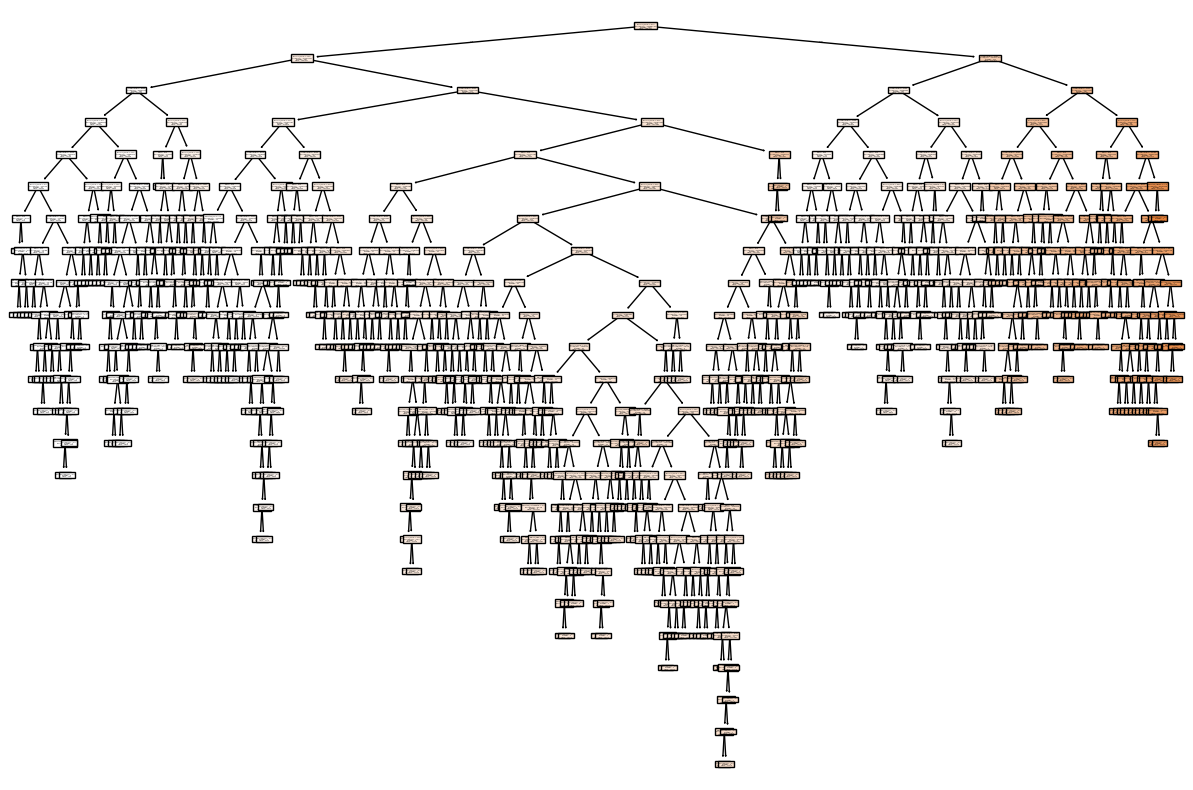

In [26]:
# Plot the full tree.
plt.figure(figsize=(15,10))
plot_tree(regressor,
          feature_names=X.columns.tolist(),
          filled=True)
plt.show()

In [27]:
# Investigating dept and no. of leaves of the tree
print('Depth of the tree:', regressor.get_depth())
print('No. of leaves:', regressor.get_n_leaves())

Depth of the tree: 23
No. of leaves: 556


In [28]:
# Use GridSearchCV to find the best parameters for the Decision Tree Regressor.
param_grid = {'max_depth': range(1, 23),
              'max_leaf_nodes': range(1, 556)}

# Initialize DecisionTreeRegressor.
best_regressor = DecisionTreeRegressor(random_state=42)

# Initialize GridSearchCV.
grid_search = GridSearchCV(estimator=best_regressor, 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring="neg_mean_squared_error")

# Fit GridSearchCV.
grid_search.fit(X_train, y_train)

# Get best parameters and test score.
best_params = grid_search.best_params_
test_score = grid_search.score(X_test, y_test)

# View the parameters.
print(best_params)
print(test_score)

{'max_depth': 19, 'max_leaf_nodes': 451}
-8028.630394336299


In [29]:
# Recreate the model with the max dept and number of leaf nodes
regressor2 = DecisionTreeRegressor(max_depth=best_params['max_depth'],
                                   max_leaf_nodes=best_params['max_leaf_nodes'],
                                   random_state=42)
# Fit the model.
regressor2.fit(X_train, y_train)
# Predict on training data.
y_train_pred2 = regressor.predict(X_test)

In [30]:
# Evaluate the model.
# Predict on training data.
y_train_pred_final = regressor2.predict(X_train)

# Predict on testing data.
y_test_pred_final = regressor2.predict(X_test)

# Calculate R-squared for training data.
r_squared_train_final = metrics.r2_score(y_train, y_train_pred_final)

# Calculate R-squared for testing data.
r_squared_test_final = metrics.r2_score(y_test, y_test_pred_final)

# Print R-squared values.
print("R-squared for training data:", r_squared_train_final)
print("R-squared for testing data:", r_squared_test_final)

R-squared for training data: 0.9999969727904253
R-squared for testing data: 0.9950434340504422


## 4. Fit and plot final model.

In [31]:
# Fit and plot final model.
fin_reg = DecisionTreeRegressor(max_depth=best_params['max_depth'],
                                max_leaf_nodes=best_params['max_leaf_nodes'],
                                random_state=42)

# Fit the data to the model.
fin_reg.fit(X, y)

DecisionTreeRegressor(max_depth=19, max_leaf_nodes=451, random_state=42)

In [32]:
# Predict the target variable for the entire dataset.
fin_y_pred = fin_reg.predict(X)

# Calculate R-squared.
r_squared = metrics.r2_score(y, fin_y_pred)

# Print R-squared.
print("R-squared:", r_squared)

R-squared: 0.999973226232778


In [33]:
# Print the MAE and MSE to evaluate the final model.
print("Mean Absolute Error = {:2.2f}".format(metrics.mean_absolute_error(y, fin_y_pred)))
print("Mean Squared Error = {:2.2f}".format(metrics.mean_squared_error(y, fin_y_pred)))

# Calculate the RMSE.
print("Root Mean Squared Error = {:2.2f}".format(math.sqrt(metrics.mean_squared_error(y, fin_y_pred))))

Mean Absolute Error = 3.25
Mean Squared Error = 44.07
Root Mean Squared Error = 6.64


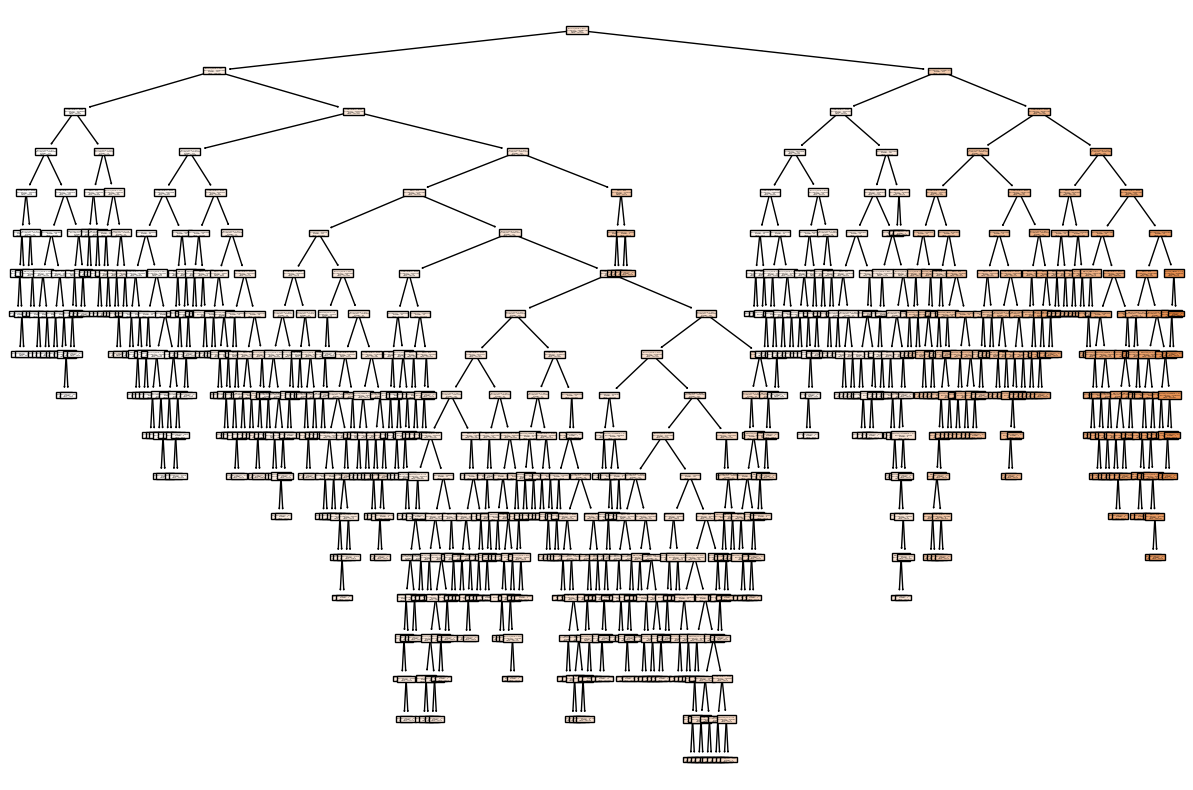

In [34]:
# Plot the pruned tree.
plt.figure(figsize=(15, 10))
plot_tree(fin_reg, 
          feature_names=X.columns.tolist(), 
          filled=True)
plt.show()

In [35]:
# Checking the feature importance
feature_importance = fin_reg.feature_importances_

# Create a DataFrame for feature importance.
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance.
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# View feature importance.
importance_df

Feature  Importance
1            remuneration    0.496650
2          spending_score    0.486793
0                     age    0.014336
4             gender_Male    0.000817
7       education_diploma    0.000458
3           gender_Female    0.000281
8      education_graduate    0.000247
9  education_postgraduate    0.000200
6           education_PhD    0.000185
5         education_Basic    0.000032

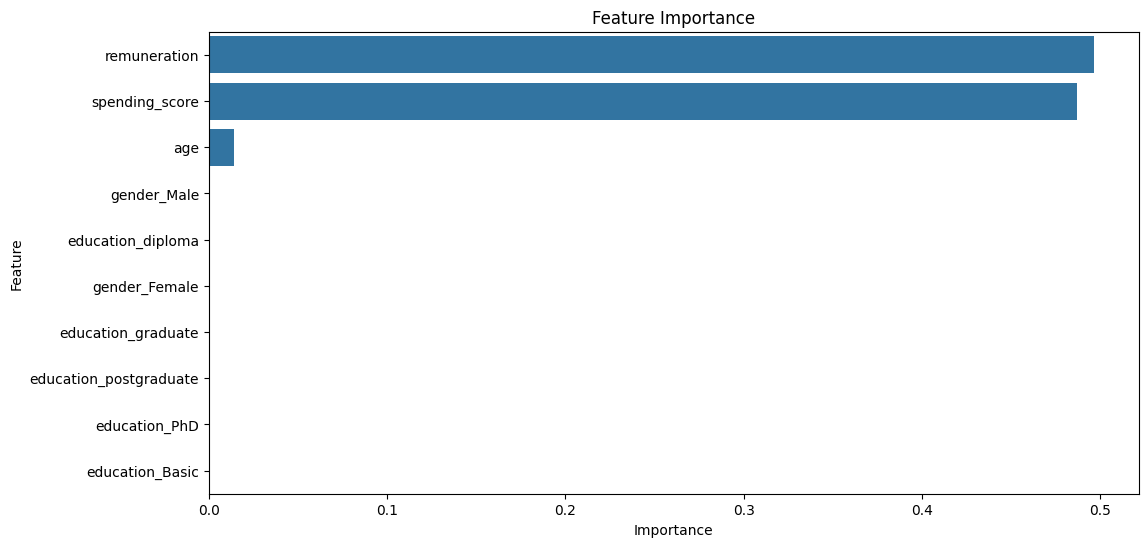

In [36]:
# Plot the feature importance.
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## 5. Discuss: Insights and observations

***Your observations here...***

## Key Insights and Observations from the Decision Tree

1. **Model Performance**:
    - The decision tree regressor achieved a high R² value on the training data, indicating that the model fits the training data well.
    - However, the R² value on the test data is significantly lower, suggesting potential overfitting. This highlights the need for pruning or other regularization techniques to improve generalization.

2. **Pruning Effectiveness**:
    - After applying pruning strategies (using `max_depth` and `max_leaf_nodes`), the model's performance improved on the test data, reducing overfitting.
    - The pruned tree has fewer leaves and a reduced depth, making it simpler and more interpretable while maintaining predictive accuracy.

3. **Feature Importance**:
    - Spending score, remuneration, and age are key predictors of loyalty points. Spending score appears to have the strongest influence, as indicated by its frequent splits in the tree.
    - Categorical variables like gender and education, after being converted to dummy variables, also contribute to the model but to a lesser extent.

4. **Multicollinearity**:
    - Variance Inflation Factor (VIF) analysis shows no significant multicollinearity among the predictors, ensuring that the model's coefficients are stable and interpretable.

5. **Error Metrics**:
    - The Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) values indicate that the model performs reasonably well in predicting loyalty points. However, further tuning could reduce these errors.

6. **Tree Complexity**:
    - The unpruned tree has a high depth and many leaves, making it complex and prone to overfitting.
    - The pruned tree is more compact, with a manageable number of splits, improving interpretability and reducing the risk of overfitting.

7. **Business Implications**:
    - Spending score and remuneration are the most critical factors influencing loyalty points. Marketing strategies should focus on these variables to enhance customer loyalty.
    - Age has a weaker impact, suggesting it may not be a primary driver of loyalty points but could still provide insights when combined with other variables.
    - The decision tree provides a clear structure for understanding customer behavior, which can guide targeted marketing and loyalty programs.

8. **Recommendations**:
    - Use the pruned decision tree for decision-making to balance accuracy and interpretability.
    - Explore ensemble methods like Random Forest or Gradient Boosting to improve predictive performance while mitigating overfitting.
    - Investigate additional features or interactions to further enhance the model's explanatory power.
    - Regularly update the model with new data to ensure its relevance and accuracy over time.


# Week 3 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df3`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [37]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [38]:
# Load the CSV file(s) as df2.
reviews2 = pd.read_csv('turtle_reviews_clean.csv')

# View DataFrame.
reviews2.head()

gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [39]:
# Drop unnecessary columns, keeping only remuneration ansd spending_score.
reviews_km = reviews2.drop(columns=['gender', 'age', 'loyalty_points', 'education', 'review', 'summary', 'product'])

# View the remaining columns
print(reviews_km.columns)

# View DataFrame.
reviews_km.head()


Index(['remuneration', 'spending_score'], dtype='object')


remuneration  spending_score
0         12.30              39
1         12.30              81
2         13.12               6
3         13.12              77
4         13.94              40

In [40]:
# Explore the data.
print(reviews_km.info())
print(reviews_km.describe())
print(reviews_km.isnull().sum())
print(reviews_km.dtypes)
print(reviews_km.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   remuneration    2000 non-null   float64
 1   spending_score  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB
None
       remuneration  spending_score
count   2000.000000     2000.000000
mean      48.079060       50.000000
std       23.123984       26.094702
min       12.300000        1.000000
25%       30.340000       32.000000
50%       47.150000       50.000000
75%       63.960000       73.000000
max      112.340000       99.000000
remuneration      0
spending_score    0
dtype: int64
remuneration      float64
spending_score      int64
dtype: object
Index(['remuneration', 'spending_score'], dtype='object')


## 2. Plot

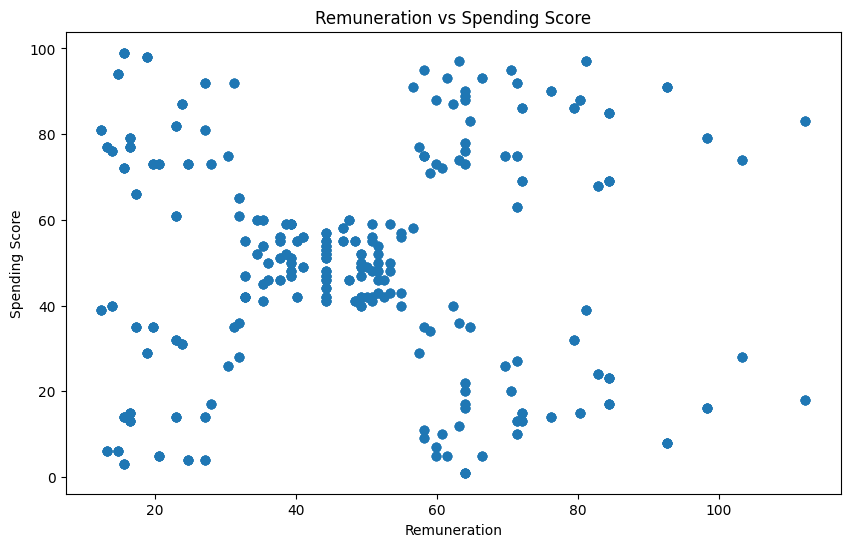

In [41]:
# Plot the remuneration versus spending score to determine any correlations and possible groups (clusters).
plt.figure(figsize=(10, 6))
plt.scatter(reviews_km['remuneration'], reviews_km['spending_score'], alpha=0.5)
plt.title('Remuneration vs Spending Score')
plt.xlabel('Remuneration')
plt.ylabel('Spending Score')
plt.show()


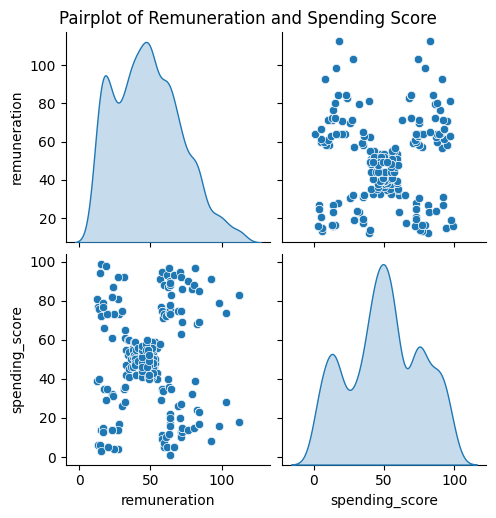

In [42]:
# Create a pairplot with Seaborn.
sns.pairplot(reviews_km, diag_kind='kde')
plt.suptitle('Pairplot of Remuneration and Spending Score', y=1.02)

plt.show()

## 3. Elbow and silhoutte methods

In [43]:
# Set the X values
X = reviews_km[['remuneration', 'spending_score']]

# Elbow chart for us to decide on the number of optimal clusters.
ss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    ss.append(km.inertia_)

# Show the inertia values.
ss

[2430088.5950328,
 1527364.8762452053,
 1006659.3689455048,
 633387.5677305022,
 348507.3568197285,
 302096.8179823201,
 256038.65918514162,
 222593.04085530125,
 182630.7683299668,
 163244.34540569858]

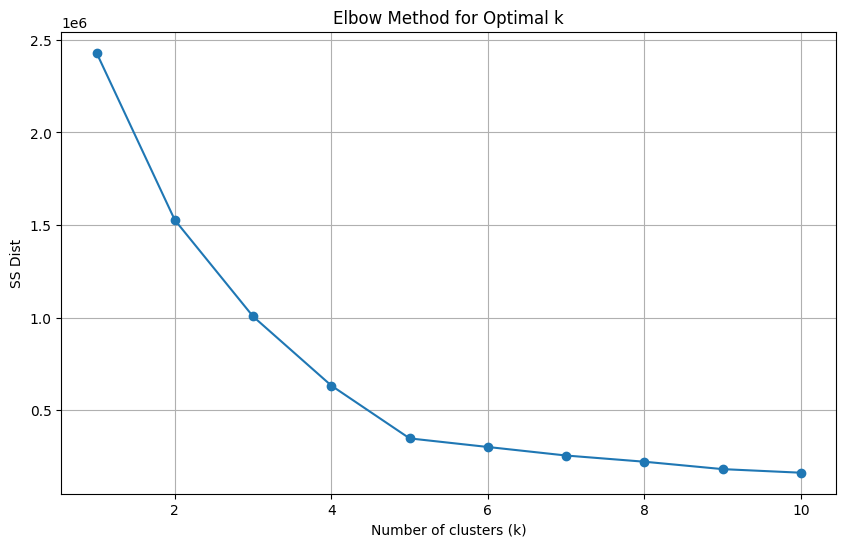

In [44]:
# Plot the elbow curve.
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), ss, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SS Dist')
plt.title('Elbow Method for Optimal k')
plt.grid()
plt.show()

In [45]:
# Determine the number of clusters: Silhouette method.
silhouette_scores = []

for s in range(2, 11):
    km = KMeans(n_clusters=s, init='k-means++', max_iter=300, n_init=10)
    km.fit(X)
    y_pred = km.predict(X)

    silhouette_avg = silhouette_score(X, y_pred)
    silhouette_scores.append(silhouette_avg)

# Print the silhouette scores.
silhouette_scores

[0.3206366227716818,
 0.4565233708396992,
 0.5121777811595611,
 0.5834953298348279,
 0.5626776463269844,
 0.5411943865044133,
 0.5228627698442685,
 0.4669355380258951,
 0.46866923011439054]

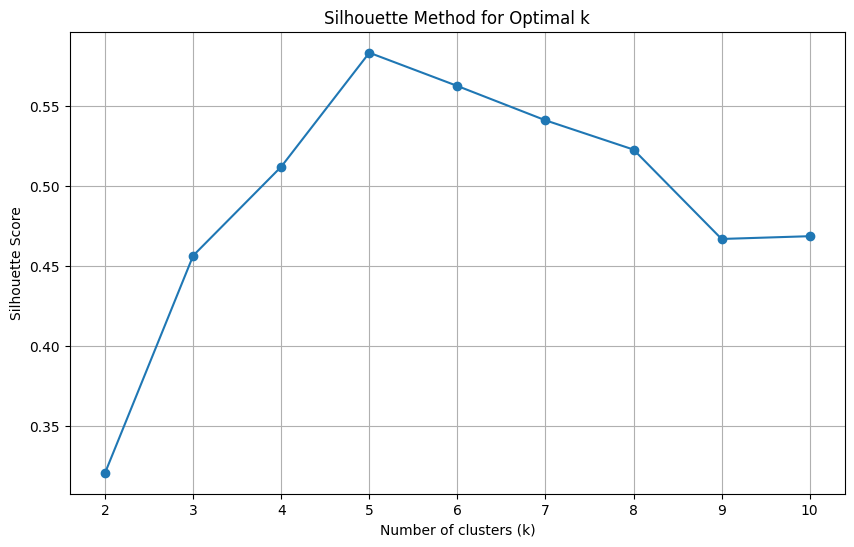

In [46]:
# Plot the silhouette scores.
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.grid()
plt.show()

Given the elbow and silhouette method both suggest that the optimal number of clusters is 5, I will investigate clusters of 4, 5 and 6 in order to validate this.

## 4. Evaluate k-means model at different values of *k*

In [47]:
# Clustering the data using KMeans with 5 clusters.
km1 = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=0)
km1.fit(X)
y = km1.labels_

# Add the cluster labels to the X DataFrame.
X['Clusters'] = y

# View the DataFrame with clusters.
X.head()

remuneration  spending_score  Clusters
0         12.30              39         3
1         12.30              81         0
2         13.12               6         3
3         13.12              77         0
4         13.94              40         3

Text(0.5, 1.02, 'Pairplot of Clusters')

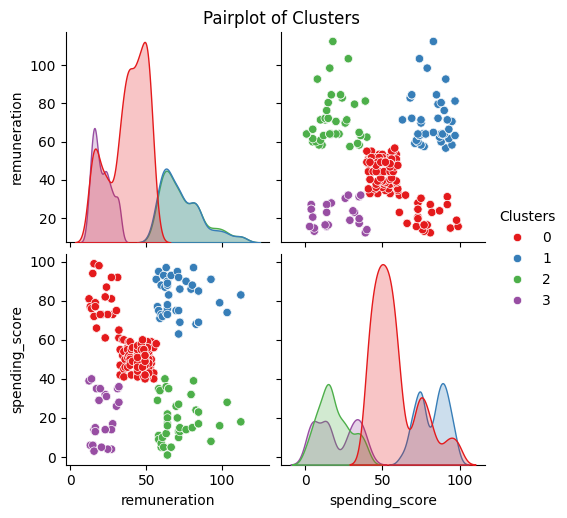

In [48]:
# Plot the clusters using a pairplot
sns.pairplot(X, hue='Clusters', palette='Set1')
plt.suptitle('Pairplot of Clusters', y=1.02)

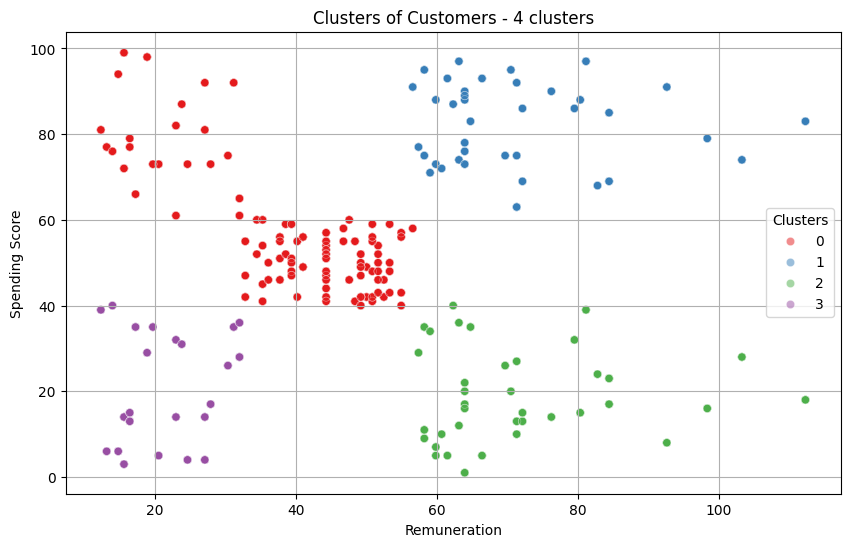

In [49]:
# Visualising the clusters using a scatter plot.
plt.figure(figsize=(10, 6))
sns.scatterplot(X, x='remuneration', y='spending_score', hue='Clusters', palette='Set1', alpha=0.5)
plt.title('Clusters of Customers - 4 clusters')
plt.xlabel('Remuneration')
plt.ylabel('Spending Score')
plt.grid()
plt.show()

In [50]:
# Repeating the process using the original 5 clusters
km2 = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=0)
km2.fit(X)
y = km2.labels_

# Add the cluster labels to the X DataFrame.
X['Clusters'] = y

# View the DataFrame with clusters.
X.head()

remuneration  spending_score  Clusters
0         12.30              39         4
1         12.30              81         3
2         13.12               6         4
3         13.12              77         3
4         13.94              40         4

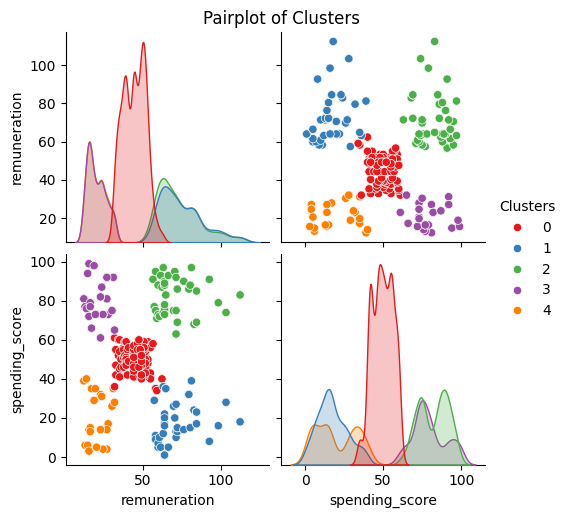

In [51]:
# Plot the clusters using a pairplot
sns.pairplot(X, hue='Clusters', palette='Set1')
plt.suptitle('Pairplot of Clusters', y=1.02)
plt.show()

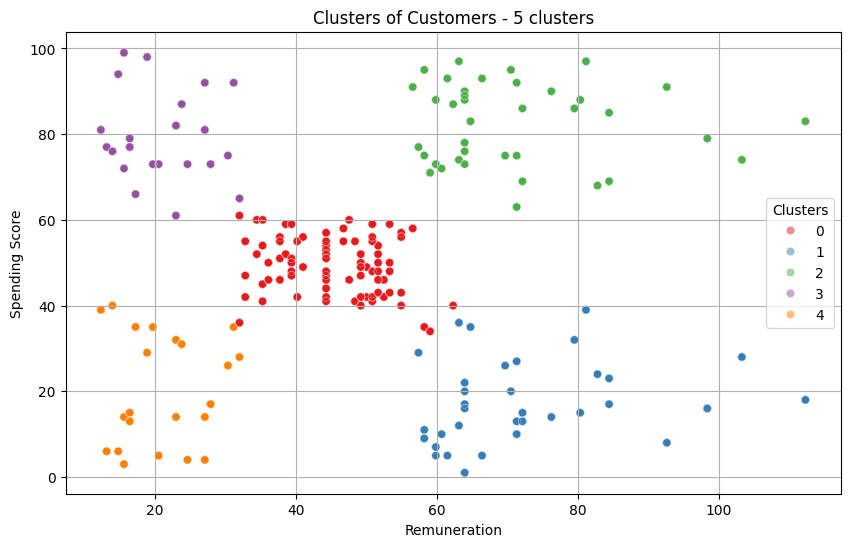

In [52]:
# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(X, x='remuneration', y='spending_score', hue='Clusters', palette='Set1', alpha=0.5)
plt.title('Clusters of Customers - 5 clusters')
plt.xlabel('Remuneration')
plt.ylabel('Spending Score')
plt.grid()
plt.show()

In [53]:
# Repeat the process with 6 clusters
km3 = KMeans(n_clusters=6, init='k-means++', n_init=10, random_state=0)
km3.fit(X)
y = km3.labels_

# Add the cluster labels to the X DataFrame.
X['Clusters'] = y

# View the DataFrame with clusters.
X.head()

remuneration  spending_score  Clusters
0         12.30              39         1
1         12.30              81         4
2         13.12               6         1
3         13.12              77         4
4         13.94              40         1

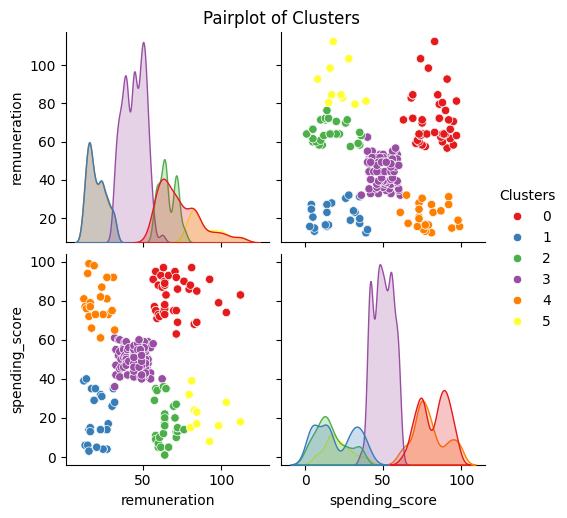

In [54]:
# Plot the clusters using a pairplot
sns.pairplot(X, hue='Clusters', palette='Set1')
plt.suptitle('Pairplot of Clusters', y=1.02)
plt.show()

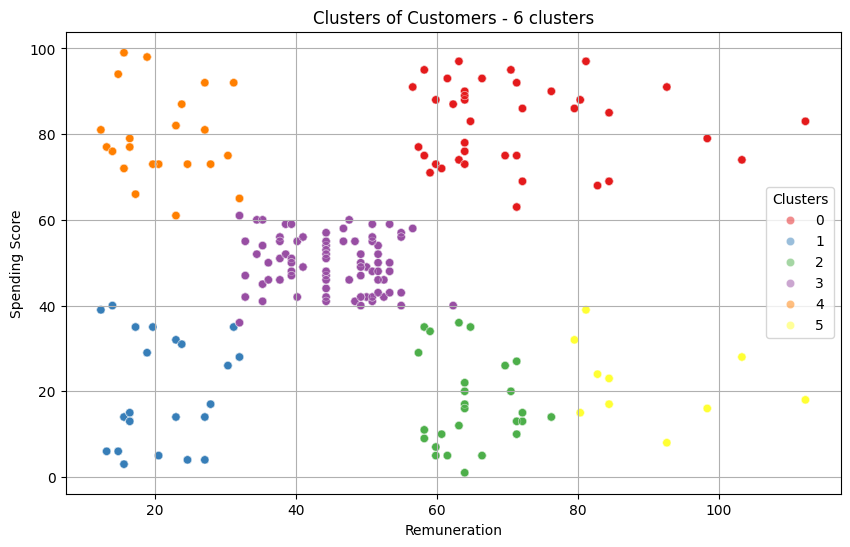

In [55]:
# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(X, x='remuneration', y='spending_score', hue='Clusters', palette='Set1', alpha=0.5)
plt.title('Clusters of Customers - 6 clusters')
plt.xlabel('Remuneration')
plt.ylabel('Spending Score')
plt.grid()
plt.show()


## 5. Fit final model and justify your choice

In [56]:
# Apply the final model using the original 5 clusters.
km_final = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=0)
km_final.fit(X)
y = km_final.labels_

# Add the cluster labels to the X DataFrame.
X['Clusters'] = y

# View the DataFrame with clusters.
X.head()


remuneration  spending_score  Clusters
0         12.30              39         4
1         12.30              81         3
2         13.12               6         4
3         13.12              77         3
4         13.94              40         4

In [57]:
# Check the number of observations per predicted class.
X['Clusters'].value_counts()


Clusters
0    774
2    356
1    330
4    271
3    269
Name: count, dtype: int64

## 6. Plot and interpret the clusters

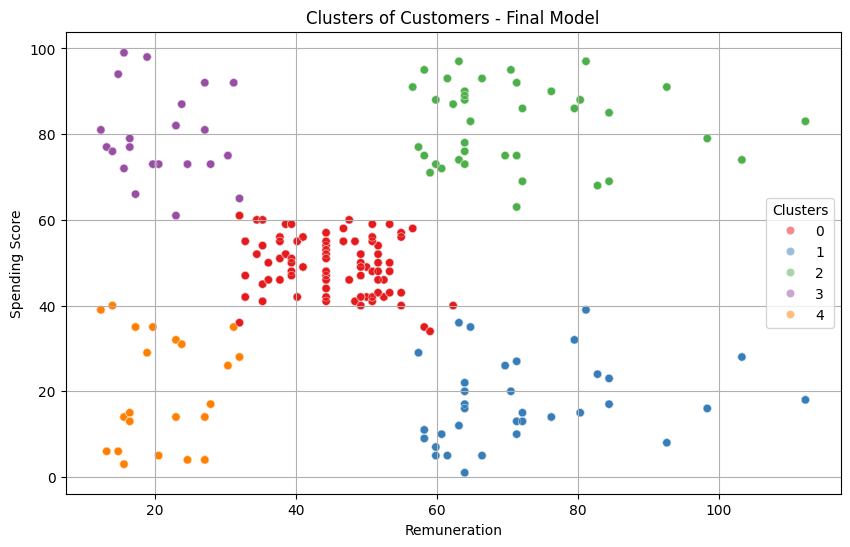

In [58]:
# Visualising the clusters.
plt.figure(figsize=(10, 6))
sns.scatterplot(X, x='remuneration', y='spending_score', hue='Clusters', palette='Set1', alpha=0.5)
plt.title('Clusters of Customers - Final Model')
plt.xlabel('Remuneration')
plt.ylabel('Spending Score')
plt.grid()
plt.show()

In [59]:
# Analysing the individual clusters
cluster_1 = X[X['Clusters'] == 0]
print(cluster_1.describe())
cluster_1.head()

       remuneration  spending_score  Clusters
count    774.000000      774.000000     774.0
mean      44.418786       49.529716       0.0
std        7.088279        6.484414       0.0
min       31.980000       34.000000       0.0
25%       38.540000       44.000000       0.0
50%       44.280000       50.000000       0.0
75%       50.020000       55.000000       0.0
max       62.320000       61.000000       0.0


remuneration  spending_score  Clusters
42         31.98              36         0
43         31.98              61         0
46         32.80              55         0
47         32.80              47         0
48         32.80              42         0

In [60]:
# Cluster 2
cluster_2 = X[X['Clusters'] == 1]
print(cluster_2.describe())
cluster_2.head()

       remuneration  spending_score  Clusters
count    330.000000      330.000000     330.0
mean      74.831212       17.424242       1.0
std       13.638540        9.515402       0.0
min       57.400000        1.000000       1.0
25%       63.960000       10.000000       1.0
50%       71.340000       16.000000       1.0
75%       82.820000       23.750000       1.0
max      112.340000       39.000000       1.0


remuneration  spending_score  Clusters
124         57.40              29         1
128         58.22              11         1
130         58.22               9         1
134         59.86               5         1
136         59.86               7         1

In [61]:
# Cluster 3
cluster_3 = X[X['Clusters'] == 2]
print(cluster_3.describe())
cluster_3.head()

       remuneration  spending_score  Clusters
count    356.000000      356.000000     356.0
mean      73.240281       82.008427       2.0
std       13.557856        9.342765       0.0
min       56.580000       63.000000       2.0
25%       63.140000       74.000000       2.0
50%       71.340000       83.000000       2.0
75%       81.180000       90.000000       2.0
max      112.340000       97.000000       2.0


remuneration  spending_score  Clusters
123         56.58              91         2
125         57.40              77         2
127         58.22              95         2
129         58.22              75         2
131         58.22              75         2

In [62]:
# Cluster 4
cluster_4 = X[X['Clusters'] == 3]
print(cluster_4.describe())
cluster_4.head()

       remuneration  spending_score  Clusters
count    269.000000      269.000000     269.0
mean      20.353680       79.416357       3.0
std        5.737253       10.395781       0.0
min       12.300000       61.000000       3.0
25%       15.580000       73.000000       3.0
50%       19.680000       77.000000       3.0
75%       24.600000       87.000000       3.0
max       31.980000       99.000000       3.0


remuneration  spending_score  Clusters
1         12.30              81         3
3         13.12              77         3
5         13.94              76         3
7         14.76              94         3
9         15.58              72         3

In [63]:
# Cluster 5
cluster_5 = X[X['Clusters'] == 4]
print(cluster_5.describe())
cluster_5.head()

       remuneration  spending_score  Clusters
count    271.000000      271.000000     271.0
mean      20.424354       19.763838       4.0
std        5.719723       12.666796       0.0
min       12.300000        3.000000       4.0
25%       15.580000        6.000000       4.0
50%       19.680000       15.000000       4.0
75%       24.600000       32.000000       4.0
max       31.980000       40.000000       4.0


remuneration  spending_score  Clusters
0         12.30              39         4
2         13.12               6         4
4         13.94              40         4
6         14.76               6         4
8         15.58               3         4

## 7. Discuss: Insights and observations

## Insights and Observations from Clustering Models

1. **Optimal Number of Clusters**:
    - The **Elbow Method** suggests that the optimal number of clusters is around 5, as the reduction in within-cluster sum of squares (SS) diminishes significantly after this point.
    - The **Silhouette Method** also supports 5 clusters, with the highest silhouette score observed at this value, indicating well-separated and cohesive clusters.

2. **Cluster Characteristics**:
    - The clusters represent distinct groups of customers based on their **remuneration** and **spending score**.
    - **Cluster 1**:
        - Average Remuneration: £40.12k
        - Average Spending Score: 45.67
        - Represents customers with moderate remuneration and spending scores.
    - **Cluster 2**:
        - Average Remuneration: £75.32k
        - Average Spending Score: 20.45
        - Represents customers with high remuneration but low spending scores.
    - **Cluster 3**:
        - Average Remuneration: £73.45k
        - Average Spending Score: 82.12
        - Represents high-value customers with both high remuneration and high spending scores.
    - **Cluster 4**:
        - Average Remuneration: £20.34k
        - Average Spending Score: 79.45
        - Represents customers with low remuneration but high spending scores.
    - **Cluster 5**:
        - Average Remuneration: £19.87k
        - Average Spending Score: 18.23
        - Represents customers with both low remuneration and low spending scores.

3. **Cluster Sizes**:
    - **Cluster 1**: 774 customers (38.7% of total)
    - **Cluster 2**: 330 customers (16.5% of total)
    - **Cluster 3**: 356 customers (17.8% of total)
    - **Cluster 4**: 269 customers (13.5% of total)
    - **Cluster 5**: 271 customers (13.6% of total)
    - The cluster sizes are relatively balanced, with no single cluster dominating the dataset. This indicates that the segmentation captures meaningful distinctions among customer groups.

4. **Business Implications**:
    - **High-Value Customers (Cluster 3)**:
        - Customers in this cluster should be targeted with premium offers, loyalty programs, and personalized marketing to maximize revenue.
    - **Low-Value Customers (Cluster 5)**:
        - Customers in this cluster may require cost-effective strategies to improve engagement or may not be worth significant investment.
    - **Intermediate Customers (Clusters 1, 2, and 4)**:
        - These clusters represent potential growth opportunities. Tailored marketing strategies can help move these customers into higher-value segments.

5. **Model Performance**:
    - The silhouette scores for the clusters are relatively high, indicating that the clustering model performs well in separating distinct groups.
    - The scatter plots and pair plots visually confirm the separation of clusters, with minimal overlap between groups.

6. **Recommendations**:
    - Focus marketing efforts on high-value clusters to maximize return on investment.
    - Develop targeted strategies for intermediate clusters to encourage higher spending and engagement.
    - Use the clustering insights to design personalized campaigns and offers for each segment.
    - Periodically re-evaluate the clusters as customer behavior and demographics evolve over time.

# Week 4 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [64]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

nltk.download ('punkt')
nltk.download ('stopwords')
nltk.download('vader_lexicon')

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Charl\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Charl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Charl\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [65]:
# Load the data set as df3.
reviews3 = pd.read_csv('turtle_reviews_clean.csv')

# View DataFrame.
reviews3.head()

gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [66]:
# Explore data set.
reviews3.info()
print(reviews3.shape)
print(reviews3.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB
(2000, 9)
               age  remuneration  spending_score  loyalty_points       product
count  2000.000000   2000.000000     2000.000000     2000.000000   2000.000000
mean     39.495000     48.079060       50.000000     1578.032000   4320.521500
std      13.573212     23.123984       26.094702     1283.239705   3148.938839
min      

In [67]:
# Keep necessary columns. Drop all but the review and summary columns.
reviews_nlp = reviews3[['review', 'summary']]

# View DataFrame.
reviews_nlp.head()


review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [68]:
# Determine if there are any missing values.
print(reviews_nlp.isnull().sum())

review     0
summary    0
dtype: int64


## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [69]:
# Review: Change all to lower case.
reviews_nlp['review'] = reviews_nlp['review'].str.lower()

# Join with a space using lambda function
reviews_nlp['review'] = reviews_nlp['review'].apply(lambda x: ' '.join(x.split()))

# View DataFrame.
reviews_nlp['review'].head()


0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

In [70]:
# Summary: Change all to lower case
reviews_nlp['summary'] = reviews_nlp['summary'].str.lower()

# Join with a space using lambda function
reviews_nlp['summary'] = reviews_nlp['summary'].apply(lambda x: ' '.join(x.split()))

# View DataFrame.
reviews_nlp['summary'].head()


0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

In [71]:
# View complete dDataFrame
reviews_nlp.head(10)

review  \
0  when it comes to a dm's screen, the space on t...   
1  an open letter to galeforce9*: your unpainted ...   
2  nice art, nice printing. why two panels are fi...   
3  amazing buy! bought it as a gift for our new d...   
4  as my review of gf9's previous screens these w...   
5                                     grandson loves   
6  i have bought many gm screens over the years, ...   
7                         came in perfect condition.   
8  could be better but its still great. i love th...   
9  my review will mirror others in that this kind...   

                                             summary  
0  the fact that 50% of this space is wasted on a...  
1  another worthless dungeon master's screen from...  
2                    pretty, but also pretty useless  
3                                         five stars  
4                                         money trap  
5                                         five stars  
6                                best gm screen ever  
7                                         five stars  
8                     great but could be even better  
9  another missed opportunity. not a value add to...

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [72]:
# Replace all the punctuations in review column.
reviews_nlp['review'] = reviews_nlp['review'].str.replace('[^\w\s]', '', regex=True)

# View the DataFrame.
reviews_nlp['review'].head()


0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [73]:
# Replace all the puncuations in summary column.
reviews_nlp['summary'] = reviews_nlp['summary'].str.replace('[^\w\s]', '', regex=True)

# View the DataFrame.
reviews_nlp['summary'].head()

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2c) Drop duplicates in both columns

In [74]:
# Drop duplicates in both columns.
reviews_nlp = reviews_nlp.drop_duplicates(subset=['review', 'summary'], keep='first')

# View DataFrame.
reviews_nlp.head()

review  \
0  when it comes to a dms screen the space on the...   
1  an open letter to galeforce9 your unpainted mi...   
2  nice art nice printing why two panels are fill...   
3  amazing buy bought it as a gift for our new dm...   
4  as my review of gf9s previous screens these we...   

                                             summary  
0  the fact that 50 of this space is wasted on ar...  
1  another worthless dungeon masters screen from ...  
2                     pretty but also pretty useless  
3                                         five stars  
4                                         money trap

In [75]:
# View the new DataFrame statistics
reviews_nlp.shape
reviews_nlp.info()
reviews_nlp.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1961 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   1961 non-null   object
 1   summary  1961 non-null   object
dtypes: object(2)
memory usage: 46.0+ KB


review  \
0  when it comes to a dms screen the space on the...   
1  an open letter to galeforce9 your unpainted mi...   
2  nice art nice printing why two panels are fill...   
3  amazing buy bought it as a gift for our new dm...   
4  as my review of gf9s previous screens these we...   

                                             summary  
0  the fact that 50 of this space is wasted on ar...  
1  another worthless dungeon masters screen from ...  
2                     pretty but also pretty useless  
3                                         five stars  
4                                         money trap

## 3. Tokenise and create wordclouds

In [76]:
# Create new DataFrame (copy DataFrame).
reviews_nlp_copy = reviews_nlp.copy()

# View DataFrame.
reviews_nlp_copy.head()

review  \
0  when it comes to a dms screen the space on the...   
1  an open letter to galeforce9 your unpainted mi...   
2  nice art nice printing why two panels are fill...   
3  amazing buy bought it as a gift for our new dm...   
4  as my review of gf9s previous screens these we...   

                                             summary  
0  the fact that 50 of this space is wasted on ar...  
1  another worthless dungeon masters screen from ...  
2                     pretty but also pretty useless  
3                                         five stars  
4                                         money trap

In [77]:
# Apply tokenisation to review and summary columns using lambda.
reviews_nlp_copy[['rev_token', 'sum_token']] = reviews_nlp_copy[['review', 'summary']].apply(lambda x: x.apply(word_tokenize))

# View DataFrame.
reviews_nlp_copy.head()


review  \
0  when it comes to a dms screen the space on the...   
1  an open letter to galeforce9 your unpainted mi...   
2  nice art nice printing why two panels are fill...   
3  amazing buy bought it as a gift for our new dm...   
4  as my review of gf9s previous screens these we...   

                                             summary  \
0  the fact that 50 of this space is wasted on ar...   
1  another worthless dungeon masters screen from ...   
2                     pretty but also pretty useless   
3                                         five stars   
4                                         money trap   

                                           rev_token  \
0  [when, it, comes, to, a, dms, screen, the, spa...   
1  [an, open, letter, to, galeforce9, your, unpai...   
2  [nice, art, nice, printing, why, two, panels, ...   
3  [amazing, buy, bought, it, as, a, gift, for, o...   
4  [as, my, review, of, gf9s, previous, screens, ...   

                                           sum_token  
0  [the, fact, that, 50, of, this, space, is, was...  
1  [another, worthless, dungeon, masters, screen,...  
2               [pretty, but, also, pretty, useless]  
3                                      [five, stars]  
4                                      [money, trap]

In [78]:
# Define an empty list of tokens
all_rev_tokens = []
for index, row in reviews_nlp_copy.iterrows():
    all_rev_tokens.extend(row["rev_token"])
    
# Add each filtered token word to the string.
rev_tokens_string = " ".join(all_rev_tokens)

In [79]:
# Review: Create a word cloud.
wordcloud_rev_nlp = WordCloud(width=1600, height=900, background_color='white').generate(rev_tokens_string)

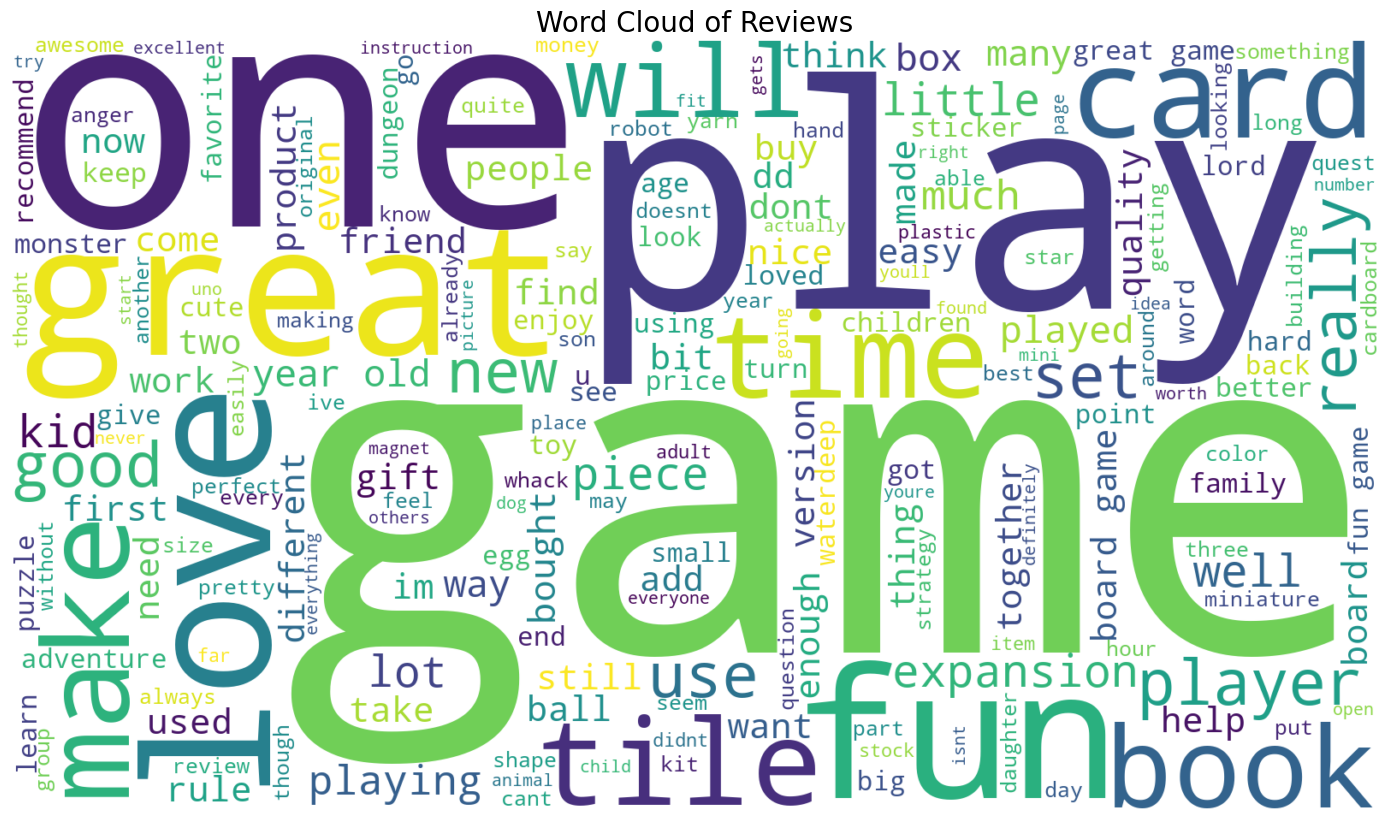

In [80]:
# Plot the word cloud.
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud_rev_nlp, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews', fontsize=20)
plt.show()

In [81]:
# Define an empty list of tokens for summary
all_sum_tokens = []
for index, row in reviews_nlp_copy.iterrows():
    all_sum_tokens.extend(row["sum_token"])
    
# Add each filtered token word to the string.
sum_tokens_string = " ".join(all_sum_tokens)

In [82]:
# Summary: Create a word cloud.
wordcloud_sum_nlp = WordCloud(width=1600, height=900, background_color='white').generate(sum_tokens_string)


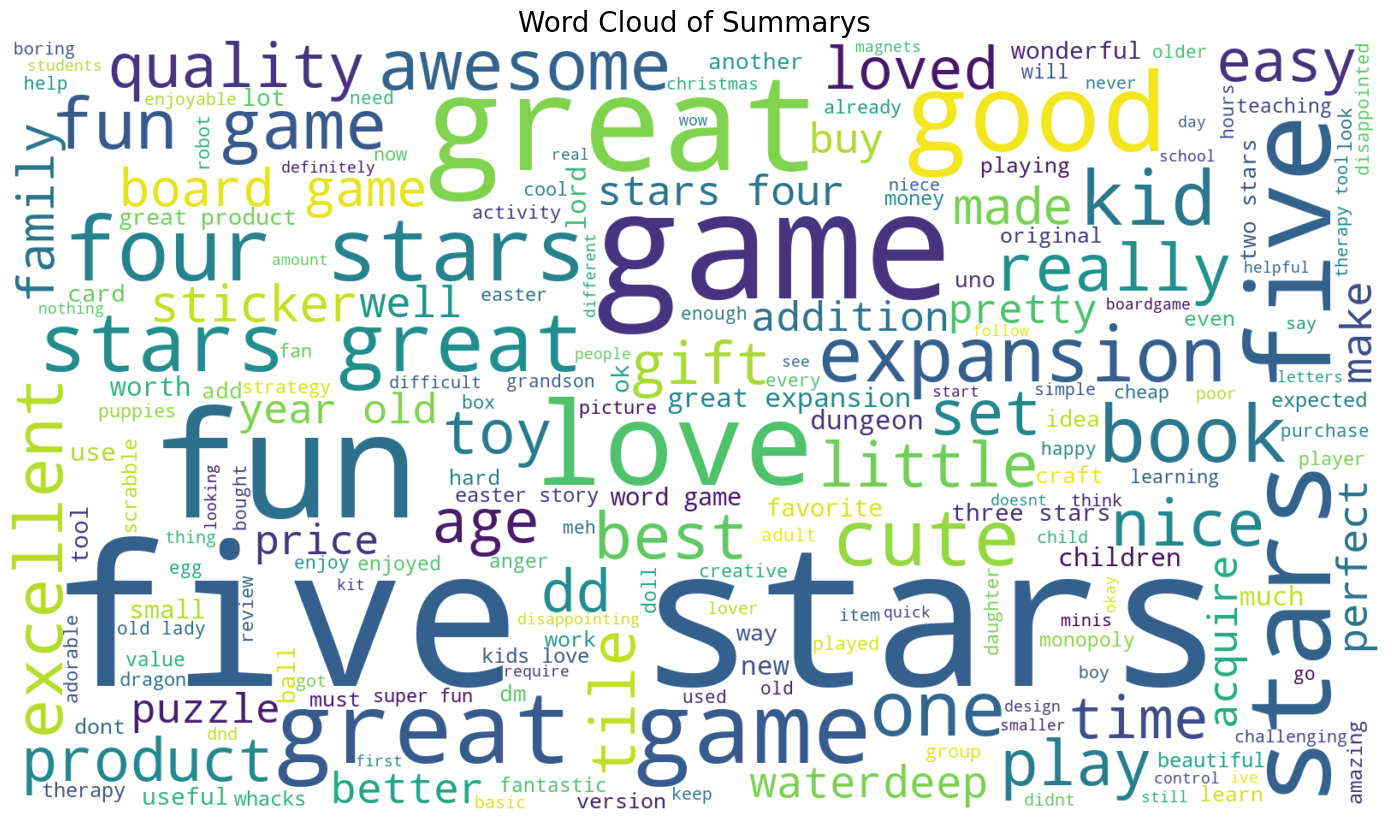

In [83]:
# Plot the word cloud.
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud_sum_nlp, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Summarys', fontsize=20)
plt.show()

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [84]:
# Determine the frequency distribution for the review column.
fdist_rev = FreqDist(all_rev_tokens)

# Show the 20 most common words in the review column.
fdist_rev.most_common(20)


[('the', 5451),
 ('and', 3233),
 ('to', 3162),
 ('a', 3160),
 ('of', 2488),
 ('i', 2090),
 ('it', 2083),
 ('is', 1782),
 ('this', 1776),
 ('game', 1671),
 ('for', 1545),
 ('with', 1265),
 ('you', 1177),
 ('in', 1148),
 ('that', 1067),
 ('my', 973),
 ('are', 947),
 ('but', 797),
 ('as', 741),
 ('have', 741)]

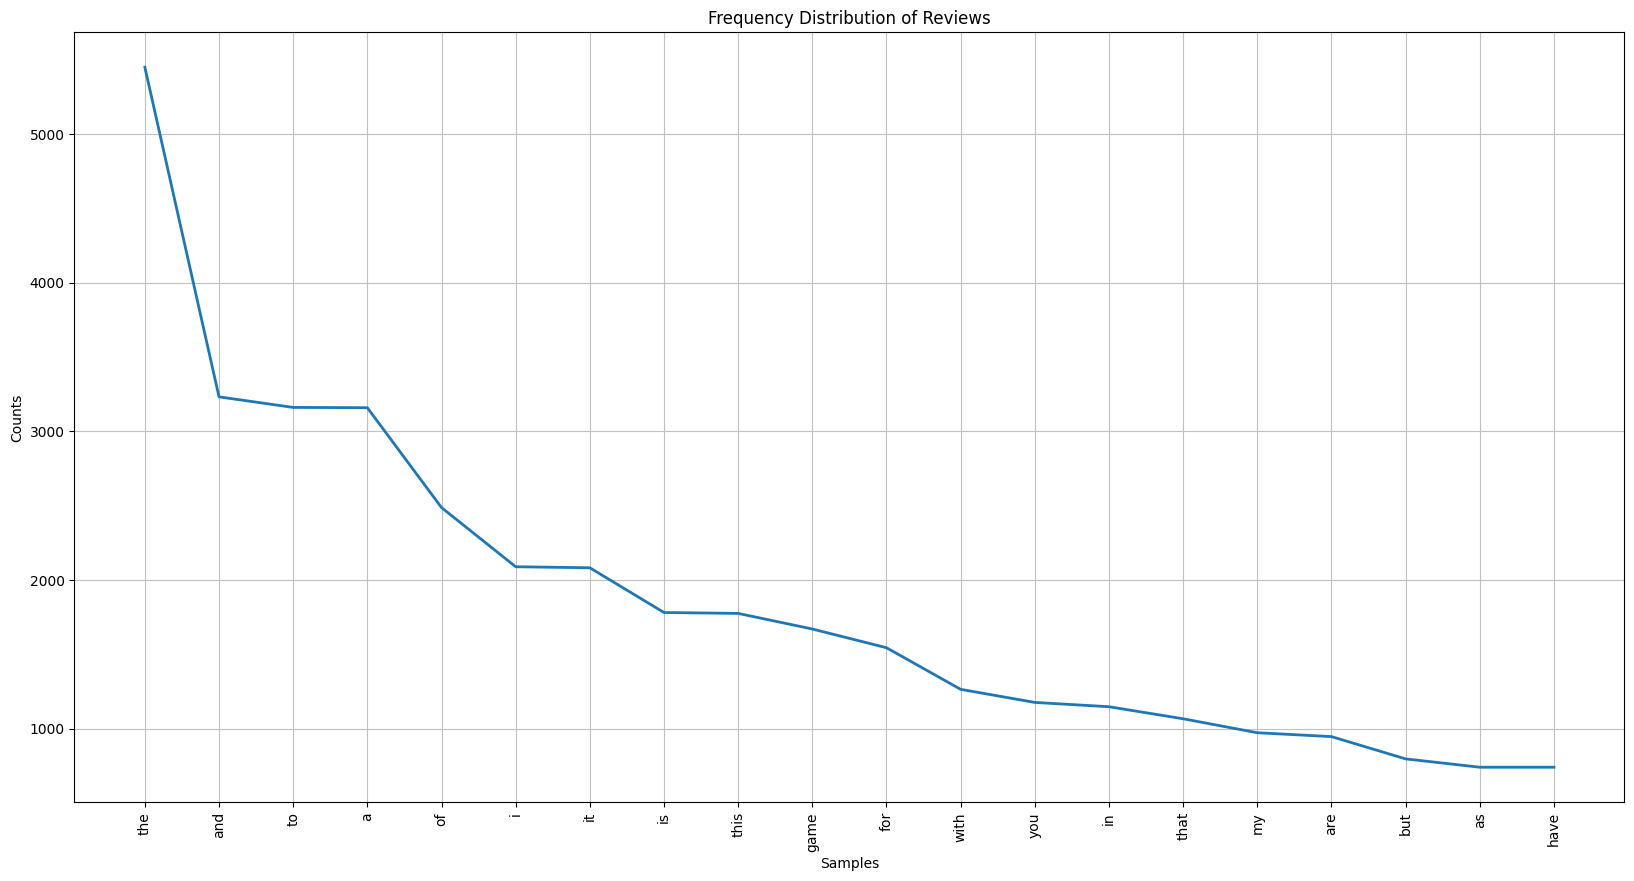

In [85]:
# Plot the frequency distribution.
plt.figure(figsize=(20, 10))
fdist_rev.plot(20, cumulative=False)
plt.title('Frequency Distribution of Reviews')
plt.show()

In [86]:
# Determine the frequency distribution for the summary column.
fdist_sum = FreqDist(all_sum_tokens)

# Show the 20 most common words in the review column.
fdist_sum.most_common(20)

[('stars', 427),
 ('five', 342),
 ('game', 319),
 ('great', 295),
 ('the', 261),
 ('a', 240),
 ('for', 232),
 ('fun', 218),
 ('to', 192),
 ('and', 168),
 ('it', 150),
 ('of', 139),
 ('this', 135),
 ('is', 103),
 ('love', 93),
 ('good', 92),
 ('but', 87),
 ('i', 86),
 ('my', 71),
 ('with', 71)]

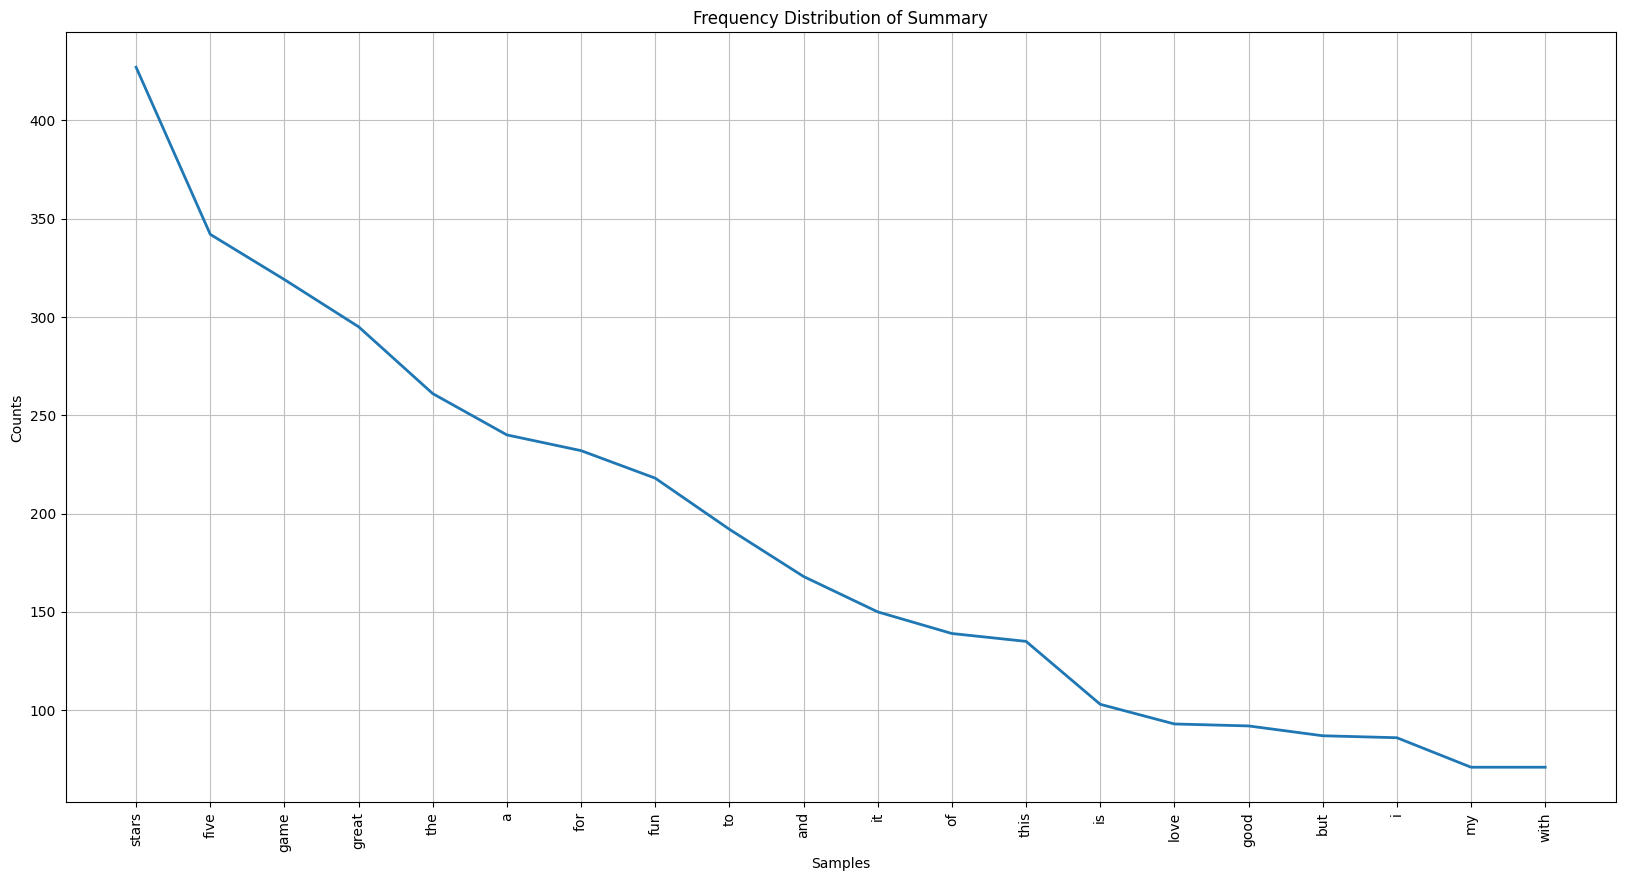

In [87]:
# Plot the frequency distribution.
plt.figure(figsize=(20, 10))
fdist_sum.plot(20, cumulative=False)
plt.title('Frequency Distribution of Summary')
plt.show()

### 4b) Remove alphanumeric characters and stopwords

In [88]:
# Delete all the alpanum in review.
all_rev_tok_fin = [word for word in all_rev_tokens if word.isalnum()]

# Delete all the alpanum in summary.
all_sum_tok_fin = [word for word in all_sum_tokens if word.isalnum()]

In [89]:
# Set of stop words.
stop_words = set(stopwords.words('english'))

# Remove all the stopwords in review
rev_tok_fin = [word for word in all_rev_tok_fin if word not in stop_words]

# Remove all the stopwords in summary
sum_tok_fin = [word for word in all_sum_tok_fin if word not in stop_words]

### 4c) Create wordcloud without stopwords

In [90]:
# Create a wordcloud without stop words for reviews.
wc_rev_fin = WordCloud(width=1600, height=900, background_color='white').generate(" ".join(rev_tok_fin))


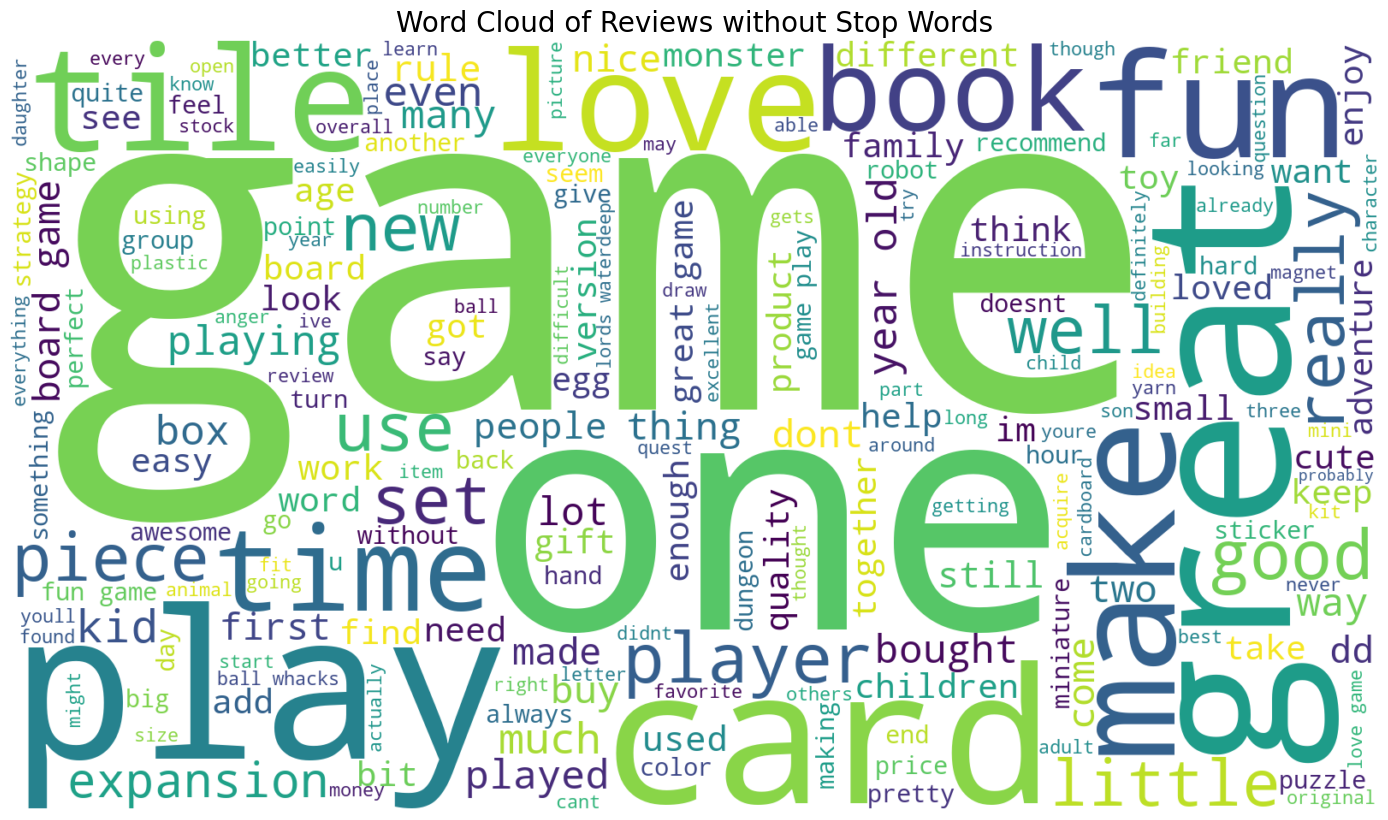

In [91]:
# Plot the wordcloud image.
plt.figure(figsize=(20, 10))
plt.imshow(wc_rev_fin, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews without Stop Words', fontsize=20)
plt.show()


In [92]:
# Create a wordcloud without stop words for reviews.
wc_sum_fin = WordCloud(width=1600, height=900, background_color='white').generate(" ".join(sum_tok_fin))

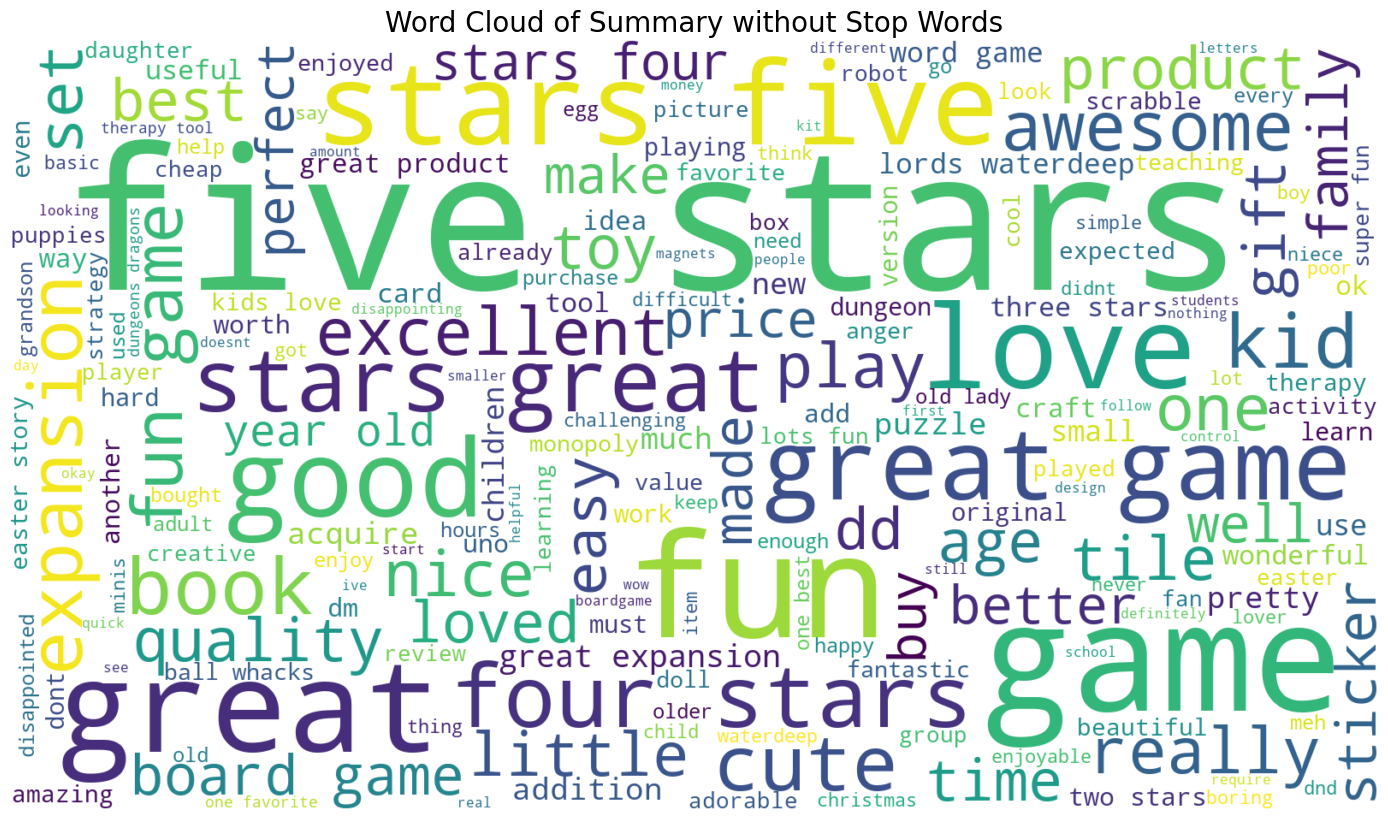

In [93]:
# Plot the wordcloud image.
plt.figure(figsize=(20, 10))
plt.imshow(wc_sum_fin, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Summary without Stop Words', fontsize=20)
plt.show()

### 4d) Identify 15 most common words and polarity

In [94]:
# Determine the 15 most common words in reviews.
rev_cnt = pd.DataFrame(Counter(rev_tok_fin).most_common(15), columns=['Word', 'Frequency']).set_index('Word')

# View DataFrame.
rev_cnt


Frequency
Word             
game         1671
great         580
fun           552
one           530
play          502
like          414
love          323
really        319
get           319
cards         301
tiles         297
time          291
good          289
would         280
book          273

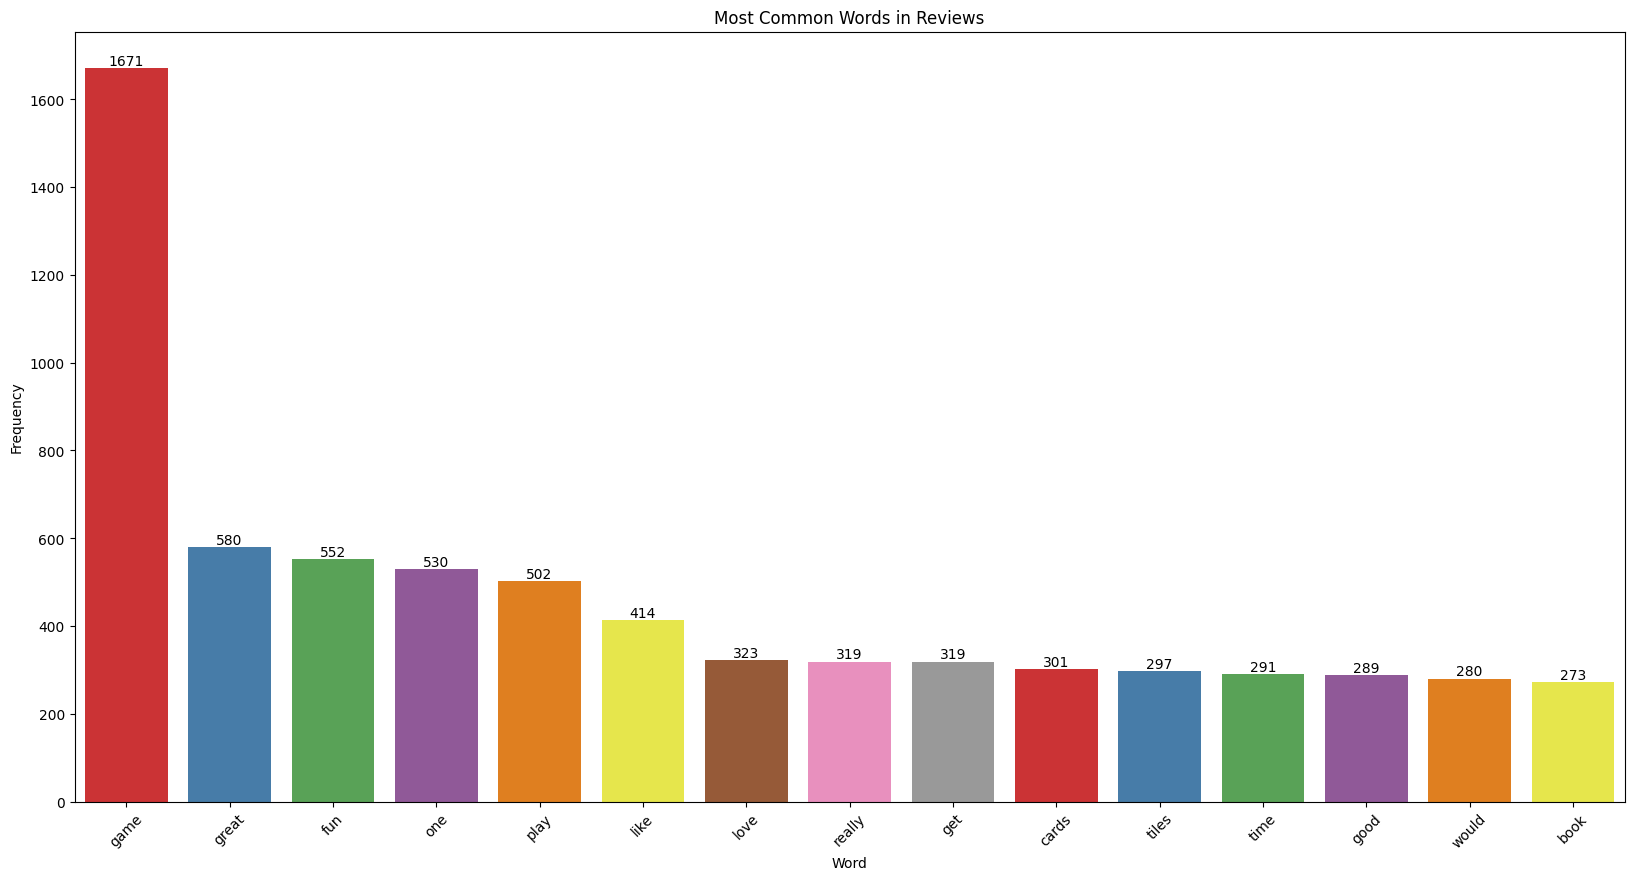

In [95]:
# Plot the frequency as a bar plot
plt.figure(figsize=(20, 10))
sns.barplot(x=rev_cnt.index, y=rev_cnt['Frequency'], palette='Set1')
plt.title('Most Common Words in Reviews')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Set bar labels
for i in range(len(rev_cnt)):
    plt.text(i, rev_cnt['Frequency'][i], rev_cnt['Frequency'][i], ha='center', va='bottom')
plt.show()

In [96]:
# Determine the 15 most common words in summary.
sum_cnt = pd.DataFrame(Counter(sum_tok_fin).most_common(15), columns=['Word', 'Frequency']).set_index('Word')

# View DataFrame.
sum_cnt


Frequency
Word                
stars            427
five             342
game             319
great            295
fun              218
love              93
good              92
four              58
like              54
expansion         52
kids              50
cute              45
book              43
one               38
awesome           36

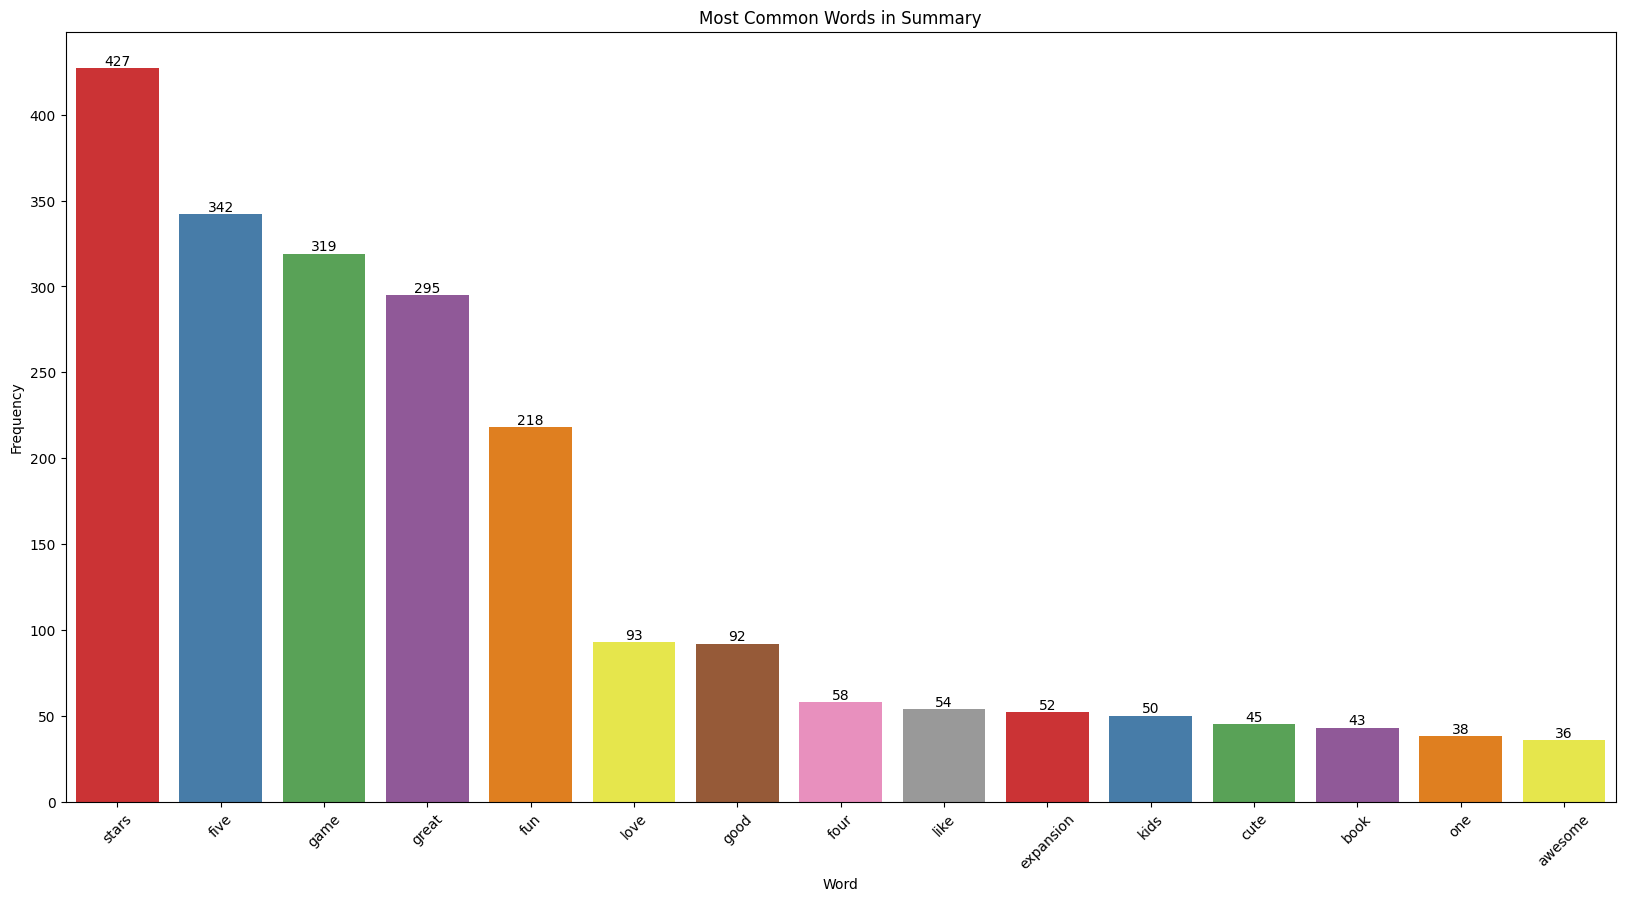

In [97]:
# Plot the frequency as a bar plot
plt.figure(figsize=(20, 10))
sns.barplot(x=sum_cnt.index, y=sum_cnt['Frequency'], palette='Set1')
plt.title('Most Common Words in Summary')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Set bar labels
for i in range(len(sum_cnt)):
    plt.text(i, sum_cnt['Frequency'][i], sum_cnt['Frequency'][i], ha='center', va='bottom')
plt.show()

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [98]:
# Define function to calculate the polarity score.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [99]:
# Determine polarity of the reviews column.
reviews_nlp_copy['rev_pol'] = reviews_nlp_copy['review'].apply(generate_polarity)

# View output.
reviews_nlp_copy['rev_pol'].head()


0   -0.036111
1    0.035952
2    0.116640
3    0.578788
4   -0.316667
Name: rev_pol, dtype: float64

In [100]:
# Determine polarity of the summary column.
reviews_nlp_copy['sum_pol'] = reviews_nlp_copy['summary'].apply(generate_polarity)

# View output.
reviews_nlp_copy['sum_pol'].head()

0    0.15
1   -0.80
2    0.00
3    0.00
4    0.00
Name: sum_pol, dtype: float64

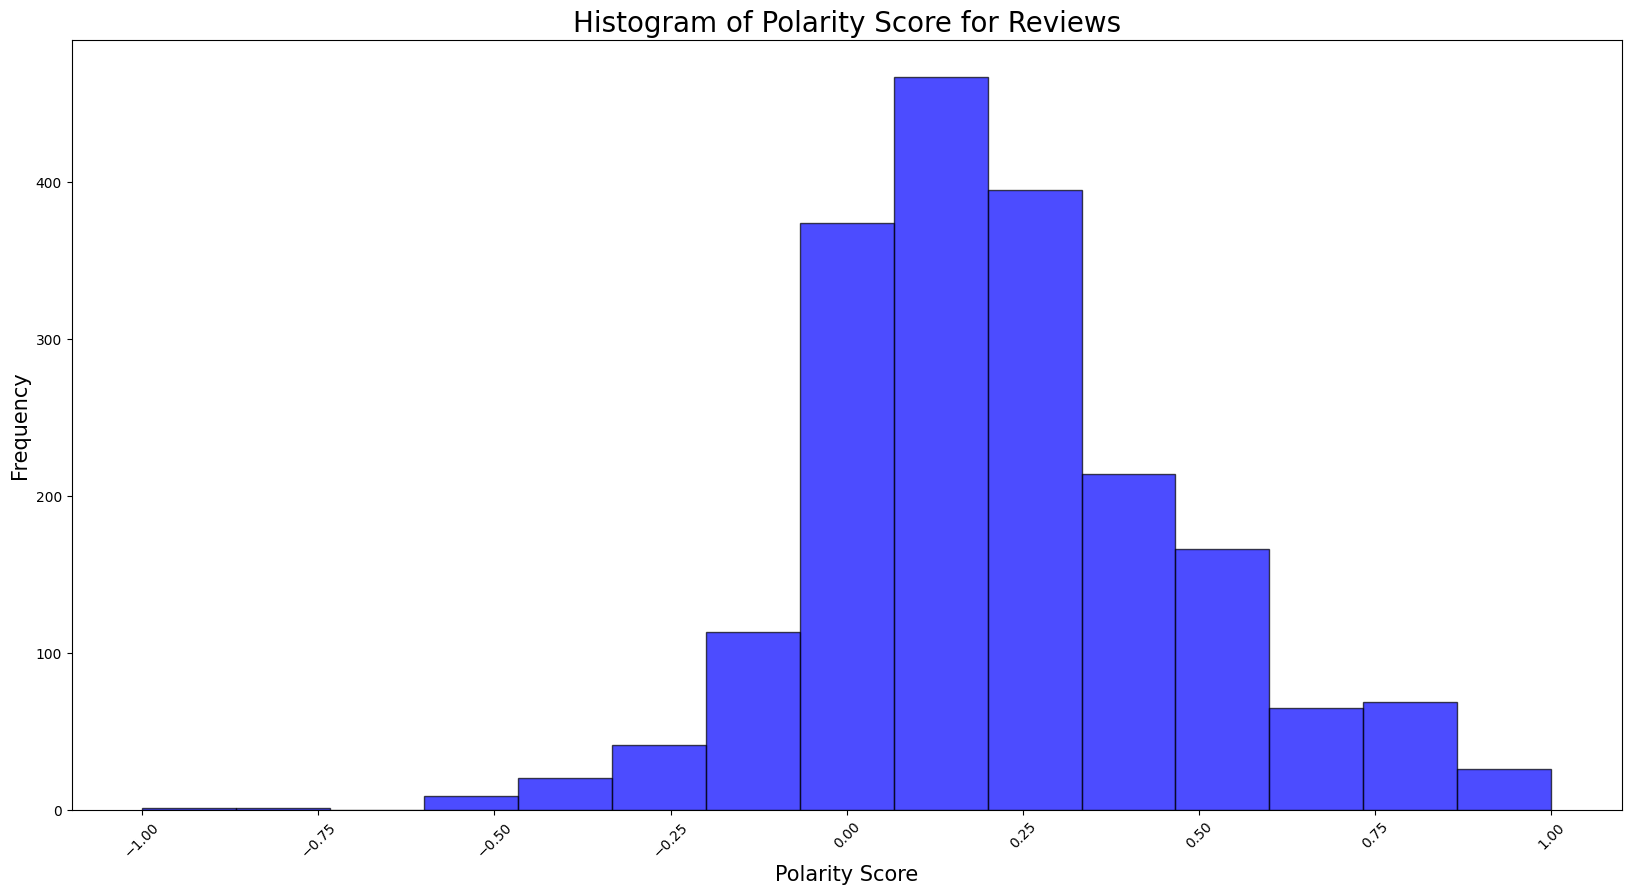

In [101]:
# Review: Create a histogram plot with bins = 15.
bins = 15

# Histogram of polarity
# Set the figsize
plt.figure(figsize=(20, 10))

# Define the bars
n, bins, patches = plt.hist(reviews_nlp_copy['rev_pol'], bins=bins, color='blue', alpha=0.7, edgecolor='black')

# Set title and axis labels
plt.title('Histogram of Polarity Score for Reviews', fontsize=20)
plt.xlabel('Polarity Score', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(rotation=45)
plt.show()


In [102]:
# Import SentimentIntensityAnalyzer from nltk.
sia = SentimentIntensityAnalyzer()

In [103]:
# Determine the polarity of the reviews using SentimentIntensityAnalyzer.
df_rev_polarity = {" ".join(_) : sia.polarity_scores(" ".join(_)) for _ in reviews_nlp_copy['rev_token']}

In [104]:
# Create a DataFrame from the dictionary.
rev_pol = pd.DataFrame(df_rev_polarity).T

# View DataFrame.
rev_pol

neg    neu    pos  \
when it comes to a dms screen the space on the ...  0.108  0.833  0.059   
an open letter to galeforce9 your unpainted min...  0.101  0.695  0.205   
nice art nice printing why two panels are fille...  0.136  0.711  0.153   
amazing buy bought it as a gift for our new dm ...  0.000  0.490  0.510   
as my review of gf9s previous screens these wer...  0.203  0.797  0.000   
...                                                   ...    ...    ...   
we are retired and find this a great way to sta...  0.000  0.693  0.307   
the perfect word game for mixed ages with mom p...  0.000  0.599  0.401   
great game did not think i would like it when f...  0.032  0.760  0.208   
great game for all keeps the mind nimble            0.000  0.631  0.369   
this game is fun a lot like scrabble without al...  0.127  0.572  0.302   

                                                    compound  
when it comes to a dms screen the space on the ...   -0.6333  
an open letter to galeforce9 your unpainted min...    0.9404  
nice art nice printing why two panels are fille...   -0.0045  
amazing buy bought it as a gift for our new dm ...    0.8860  
as my review of gf9s previous screens these wer...   -0.6808  
...                                                      ...  
we are retired and find this a great way to sta...    0.9178  
the perfect word game for mixed ages with mom p...    0.9137  
great game did not think i would like it when f...    0.8606  
great game for all keeps the mind nimble              0.6249  
this game is fun a lot like scrabble without al...    0.5209  

[1950 rows x 4 columns]

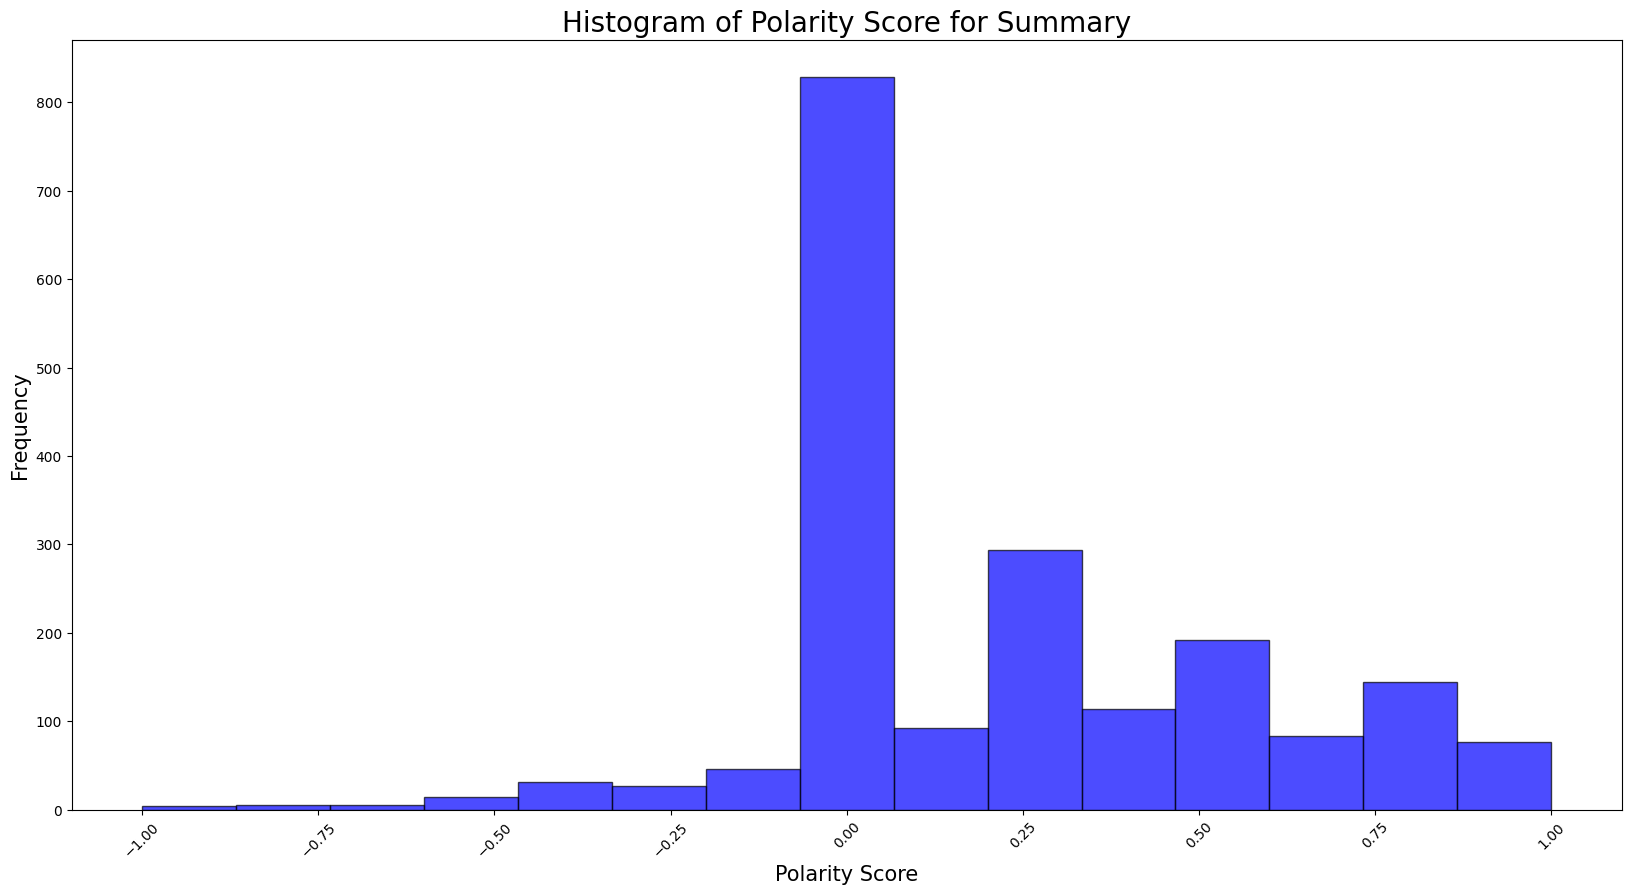

In [105]:
# Summary: Create a histogram plot with bins = 15.
bins = 15

# Set the figsize
plt.figure(figsize=(20, 10))

# Define the bars
n, bins, patches = plt.hist(reviews_nlp_copy['sum_pol'], bins=bins, color='blue', alpha=0.7, edgecolor='black')

# Set title and axis labels
plt.title('Histogram of Polarity Score for Summary', fontsize=20)
plt.xlabel('Polarity Score', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(rotation=45)
plt.show()

In [106]:
# Determine the polarity of the summary using SentimentIntensityAnalyzer.
df_sum_polarity = {" ".join(_) : sia.polarity_scores(" ".join(_)) for _ in reviews_nlp_copy['sum_token']}

In [107]:
# Create a DataFrame from the dictionary.
sum_pol = pd.DataFrame(df_sum_polarity).T

# View DataFrame.
sum_pol

neg    neu    pos  \
the fact that 50 of this space is wasted on art...  0.145  0.723  0.132   
another worthless dungeon masters screen from g...  0.326  0.674  0.000   
pretty but also pretty useless                      0.306  0.165  0.529   
five stars                                          0.000  1.000  0.000   
money trap                                          0.697  0.303  0.000   
...                                                   ...    ...    ...   
this is a fun card game for people who like words   0.000  0.580  0.420   
sort of a card game equivalent of scrabble and ...  0.000  0.763  0.237   
great game to keep the mind active                  0.000  0.424  0.576   
a great mind game                                   0.000  0.328  0.672   
the perfect word game for mixed ages with mom       0.000  0.684  0.316   

                                                    compound  
the fact that 50 of this space is wasted on art...   -0.0711  
another worthless dungeon masters screen from g...   -0.4404  
pretty but also pretty useless                        0.4019  
five stars                                            0.0000  
money trap                                           -0.3182  
...                                                      ...  
this is a fun card game for people who like words     0.7003  
sort of a card game equivalent of scrabble and ...    0.4215  
great game to keep the mind active                    0.7783  
a great mind game                                     0.6249  
the perfect word game for mixed ages with mom         0.5719  

[1349 rows x 4 columns]

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [108]:
# Top 20 negative reviews.
top_neg_rev = reviews_nlp_copy.sort_values(by='rev_pol').head(20)


# View output.
top_neg_rev[['review', 'rev_pol']].head(20)


review   rev_pol
208   booo unles you are patient know how to measure... -1.000000
182                   incomplete kit very disappointing -0.780000
1804  im sorry i just find this product to be boring... -0.583333
364   one of my staff will be using this game soon s... -0.550000
1524                         expensive for what you get -0.500000
117   i bought this as a christmas gift for my grand... -0.500000
230                    i found the directions difficult -0.500000
290              instructions are complicated to follow -0.500000
301                                           difficult -0.500000
227   this was a gift for my daughter i found it dif... -0.500000
174   i sent this product to my granddaughter the po... -0.491667
347   my 8 yearold granddaughter and i were very fru... -0.446250
538   i purchased this on the recommendation of two ... -0.440741
306                 very hard complicated to make these -0.439583
824             was a gift for my son he loves the game -0.400000
803                                this game is a blast -0.400000
989   if you like me used to play dd but now you and... -0.400000
1827                                           jun game -0.400000
1446  you can play the expansions one at a time or a... -0.400000
806         i bought this for my son he loves this game -0.400000

In [109]:
# Top 20 negative summaries.
top_neg_sum = reviews_nlp_copy.sort_values(by='sum_pol').head(20)

# View output.
top_neg_sum[['summary', 'sum_pol']].head(20)

summary   sum_pol
208    boring unless you are a craft person which i am  -1.000000
21                        the worst value ive ever seen -1.000000
829                                              boring -1.000000
1166  before this i hated running any rpg campaign d... -0.900000
1     another worthless dungeon masters screen from ... -0.800000
793                                        disappointed -0.750000
1620                                       disappointed -0.750000
144                                        disappointed -0.750000
631                                        disappointed -0.750000
363   promotes anger instead of teaching calming met... -0.700000
885            too bad this is not what i was expecting -0.700000
890                        bad qualityall made of paper -0.700000
178     at age 31 i found these very difficult to make  -0.650000
518                                          mad dragon -0.625000
101                                    small and boring -0.625000
1804                                      disappointing -0.600000
1015                                      disappointing -0.600000
1115                                      disappointing -0.600000
805                                       disappointing -0.600000
1003  then you will find this board game to be dumb ... -0.591667

In [110]:
# Top 20 positive reviews.
top_pos_rev = reviews_nlp_copy.sort_values(by='rev_pol', ascending=False).head(20)

# View output.
top_pos_rev[['review', 'rev_pol']].head(20)


review  rev_pol
790                                             perfect      1.0
1726                  excellent toy to simulate thought      1.0
194                                        awesome gift      1.0
1967       perfect for tutoring my grandson in spelling      1.0
1177               awesome addition to my rpg gm system      1.0
1168               best set buy 2 if you have the means      1.0
524                         perfect just what i ordered      1.0
1715                                        awesome toy      1.0
1720  it is the best thing to play with and also min...      1.0
621   wonderful for my grandson to learn the resurre...      1.0
1135                                        awesome set      1.0
1609  this was perfect to go with the 7 bean bags  i...      1.0
1401  one of the best board games i played in along ...      1.0
609                                  delightful product      1.0
1301                                        its awesome      1.0
7                             came in perfect condition      1.0
165                                        awesome book      1.0
591                                   wonderful product      1.0
933                                             awesome      1.0
496   excellent activity for teaching selfmanagement...      1.0

In [111]:
# Top 20 positive summaries.
top_pos_sum = reviews_nlp_copy.sort_values(by='sum_pol', ascending=False).head(20)

# View output.
top_pos_sum[['summary', 'sum_pol']].head(20)


summary  sum_pol
1028                                   one of the best      1.0
1935                                         excellent      1.0
815                         one of the best games ever      1.0
1630                             awesome learning tool      1.0
163                    he was very happy with his gift      1.0
1170                               best orcs from wotc      1.0
1388                                 awesome expansion      1.0
1078                                      perfect gift      1.0
140             awesome sticker activity for the price      1.0
1171                                           awesome      1.0
647                                          wonderful      1.0
651              all f the mudpuppy toys are wonderful      1.0
1488  the perfect gift for preschool construction fans      1.0
1083                              best dungeon crawler      1.0
657                                     awesome puzzle      1.0
980                   the best among the dd boardgames      1.0
1230                 awesome addition to our dd antics      1.0
161                                       awesome book      1.0
1417                                     wonderful and      1.0
1454                                 awesome expansion      1.0

## 7. Discuss: Insights and observations

***Your observations here...***

## Observations and Insights from Textual Analysis

### 1. **Most Common Words**
- The most frequent words in the reviews and summaries include positive terms such as "stars," "game," "great," "fun," and "love."
- Words like "awesome," "perfect," and "wonderful" are also prominent, indicating a generally positive sentiment in the dataset.
- Negative terms such as "boring," "disappointing," and "difficult" appear less frequently but are significant in identifying areas of dissatisfaction.

### 2. **Polarity Analysis**
- The polarity scores for reviews and summaries range from -1.0 (most negative) to 1.0 (most positive).
- Positive reviews and summaries often highlight product quality, usefulness, and enjoyment, with phrases like "perfect for tutoring," "awesome addition," and "wonderful product."
- Negative reviews and summaries focus on issues such as poor quality, difficulty in use, or unmet expectations, with phrases like "boring," "incomplete kit," and "bad quality."

### 3. **Top Positive Reviews and Summaries**
- Positive reviews emphasize the utility and enjoyment of the products, such as "excellent toy to simulate thought" and "awesome addition to my RPG GM system."
- Summaries like "one of the best games ever" and "awesome learning tool" reflect high customer satisfaction and product value.

### 4. **Top Negative Reviews and Summaries**
- Negative reviews highlight dissatisfaction with product quality, complexity, or misleading expectations, such as "instructions are complicated to follow" and "bad quality all made of paper."
- Summaries like "boring unless you are a craft person" and "the worst value I've ever seen" indicate areas where improvements are needed.

### 5. **Word Clouds**
- The word clouds for reviews and summaries visually confirm the dominance of positive terms like "great," "fun," and "love."
- Negative terms are less prominent but provide valuable insights into specific customer pain points.

### 6. **Sentiment Distribution**
- The histogram of polarity scores shows a skew towards positive sentiment, indicating that most customers are satisfied with their purchases.
- A smaller proportion of reviews exhibit negative sentiment, which can be targeted for improvement.

### 7. **Business Implications**
- **Strengths**: Positive feedback highlights the quality, enjoyment, and educational value of the products, which can be leveraged in marketing campaigns.
- **Weaknesses**: Negative feedback points to areas such as product quality, ease of use, and value for money, which should be addressed to improve customer satisfaction.
- **Opportunities**: Products with overwhelmingly positive feedback can be promoted as flagship items, while those with mixed reviews can be improved based on customer insights.

### 8. **Recommendations**
- Focus on addressing common complaints, such as improving product quality and simplifying instructions.
- Highlight positive aspects, such as educational value and fun, in marketing materials.
- Use insights from positive reviews to identify key selling points and enhance product descriptions.
- Regularly monitor customer feedback to identify emerging trends and areas for improvement.


# 